In [ ]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import gdown


## Data loading

In [ ]:
# Downloading the files from google drive file IDs
!gdown "1rqihT647UW9HEmERxCrTJrcZZ9xE5TEi"
!gdown 1CfORUKckP7Qi9swmCe8XEgLLWnpKl4eE
gdown.download('https://drive.google.com/uc?id=1hjHgCluvPEUfrp9w-_-73ch0d9SK6FHf') # Alternate from URL
!gdown 1ZvQn7-UtGSdJa3H9zM4ve_uzACFAzF0Z
!gdown 1tqJmtKcfhiEJXYVV21ybnD4UaXYW9r4v

Downloading...
From: https://drive.google.com/uc?id=1rqihT647UW9HEmERxCrTJrcZZ9xE5TEi
To: /content/CustomersData.xlsx
100% 42.2k/42.2k [00:00<00:00, 68.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1CfORUKckP7Qi9swmCe8XEgLLWnpKl4eE
To: /content/Discount_Coupon.csv
100% 4.92k/4.92k [00:00<00:00, 17.2MB/s]


Downloading...
From: https://drive.google.com/uc?id=1hjHgCluvPEUfrp9w-_-73ch0d9SK6FHf
To: /content/Marketing_Spend.csv
100%|██████████| 8.67k/8.67k [00:00<00:00, 16.0MB/s]


Downloading...
From: https://drive.google.com/uc?id=1ZvQn7-UtGSdJa3H9zM4ve_uzACFAzF0Z
To: /content/Online_Sales.csv
100% 5.24M/5.24M [00:00<00:00, 101MB/s]
Downloading...
From: https://drive.google.com/uc?id=1tqJmtKcfhiEJXYVV21ybnD4UaXYW9r4v
To: /content/Tax_amount.xlsx
100% 9.84k/9.84k [00:00<00:00, 24.6MB/s]


In [ ]:
df_customers = pd.read_excel('CustomersData.xlsx')
df_online_sales = pd.read_csv('Online_Sales.csv')
df_discount_coupon = pd.read_csv('Discount_Coupon.csv')
df_marketing = pd.read_csv('Marketing_Spend.csv')
df_tax = pd.read_excel('Tax_amount.xlsx')

## Looking for missing values and dtype change

In [ ]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


In [ ]:
df_customers.head(3)

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33


In [ ]:
df_online_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB


In [ ]:
# changing the datatype of Transaction date to datetime dtype
df_online_sales['Transaction_Date'] = pd.to_datetime(df_online_sales['Transaction_Date'])
df_online_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 4.0+ MB


In [ ]:
df_online_sales.head(3)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used


In [ ]:
df_discount_coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [ ]:
df_discount_coupon.head(3)

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30


In [ ]:
df_discount_coupon['Discount_pct'] = df_discount_coupon['Discount_pct'].astype('float')
df_discount_coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             204 non-null    object 
 1   Product_Category  204 non-null    object 
 2   Coupon_Code       204 non-null    object 
 3   Discount_pct      204 non-null    float64
dtypes: float64(1), object(3)
memory usage: 6.5+ KB


In [ ]:
month_dict = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
df_discount_coupon['Month'] = df_discount_coupon['Month'].map(month_dict)
df_discount_coupon['Month']

,Month
0,1
1,2
2,3
3,1
4,2
...,...
199,11
200,12
201,10
202,11


In [ ]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [ ]:
df_marketing.head(3)

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38


In [ ]:
df_marketing['Date'] = pd.to_datetime(df_marketing['Date'])
df_marketing['Offline_Spend'] = df_marketing['Offline_Spend'].astype('float')
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           365 non-null    datetime64[ns]
 1   Offline_Spend  365 non-null    float64       
 2   Online_Spend   365 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 8.7 KB


In [ ]:
df_marketing.head(3)

,Date,Offline_Spend,Online_Spend
0,2019-01-01,4500.0,2424.50
1,2019-01-02,4500.0,3480.36
2,2019-01-03,4500.0,1576.38


In [ ]:
df_tax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 452.0+ bytes


In [ ]:
df_tax.head(3)

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18


In [ ]:
df_online_sales.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status'],
      dtype='object')

## Solutions to business-case questions

### **1. Identify the months with the highest and lowest acquisition count. What strategies could be implemented to address the fluctuations and ensure consistent growth throughout the year ?**




**Solution 1a.**

*   Month of min acquisition count (68): November
*   Month of max acquisition count (215): January

**Solution 1b.**

- Provide maximum discounts during the low acquisition periods
- Target customer segments for discounts and offers

In [ ]:
# creating a dataframe acquisition that has month of first purchase for every customer ID
df_acquisition = df_online_sales[['CustomerID', 'Transaction_Date']]
df_acquisition['Transaction_month'] = df_acquisition['Transaction_Date'].dt.month
df_acquisition = df_acquisition.groupby(by='CustomerID').agg({'Transaction_month':'min'}).reset_index()
df_acquisition

,CustomerID,Transaction_month
0,12346,9
1,12347,3
2,12348,6
3,12350,12
4,12356,9
...,...,...
1463,18259,4
1464,18260,6
1465,18269,4
1466,18277,10


month of min acquisition: 11
month of max acquisition: 1


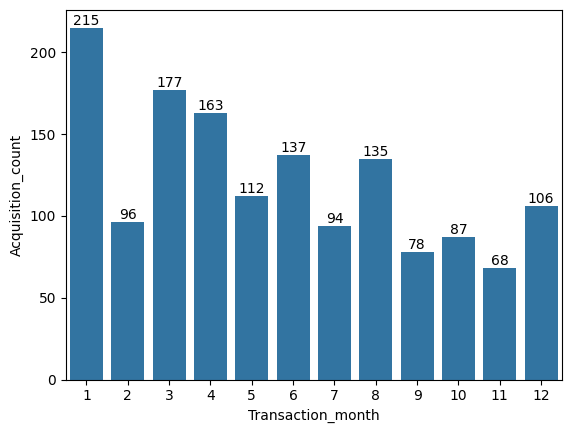

In [ ]:
# computing and plotting the number of customer acquisition per month
acquisition_count = df_acquisition['Transaction_month'].value_counts().sort_index()
ax = sbn.barplot(x=acquisition_count.index, y=acquisition_count.values)
ax.set(ylabel='Acquisition_count')
print(f"month of min acquisition: {acquisition_count.idxmin()}")
print(f"month of max acquisition: {acquisition_count.idxmax()}")
for bar in ax.containers:
    ax.bar_label(bar)

### **2. Analyze the data to determine if certain months consistently show higher or lower monthly acquisitions. How can the company capitalize on high-performing months and improve performance during slower periods?**

**Solution 2a.**

From the histogram and barplot below, following observations are noted:
|Observation|Months|
|-----------|------|
| 5 months with acquisition count < 100 | Feb, July, Sep, Oct, Nov |
| 4 months with acquisition counts > 100 and < 160 | May, June, Aug, Dec |
| 3 months with acquisition count > 160 | Jan, March, April |

- Acquisition rate is higher in the beginning of the year
- Acquisition rate is lower at the end of the year
- Acquisition rate lies in between in the summers May-August

**Solution 2b.**

From the trend plots below:
- offline-marketing expenditure correlates with acquisition count except for the last 4 months
- Avg monthly discount percentage is periodic

**Strategic recommendations**

*To captitalize on high-performing months*

- In months like January where acquisition is high with minimum discount, one must focus on high-margin products
- In months like March where acquisition is higher despite low marketing expenditure due to maximum discount. One must increase the acquisition using attractive offers with retention strategy in place. Inventory clearance could be done at this time too.

*To improve performance during weaker months*

- In months like November, commission an audit/investigation to find out why high marketing expenditure yielded low acquisition


In [ ]:
df_aqc = pd.DataFrame(acquisition_count).reset_index()
df_aqc

,Transaction_month,count
0,1,215
1,2,96
2,3,177
3,4,163
4,5,112
5,6,137
6,7,94
7,8,135
8,9,78
9,10,87


In [ ]:
df_aqc.describe()

,Transaction_month,count
count,12.000000,12.000000
mean,6.500000,122.333333
std,3.605551,44.354631
min,1.000000,68.000000
25%,3.750000,92.250000
50%,6.500000,109.000000
75%,9.250000,143.500000
max,12.000000,215.000000


In [ ]:
# Outlier detection using IQR method
IQR = df_aqc['count'].quantile(0.75) - df_aqc['count'].quantile(0.25)
llimit = df_aqc['count'].quantile(0.25) - 1.5*IQR
ulimit = df_aqc['count'].quantile(0.75) + 1.5*IQR
n_outliers = len(df_aqc.loc[(df_aqc['count'] < llimit) | (df_aqc['count'] > ulimit)])
print("number of outliers: ", n_outliers)

number of outliers:  0


Text(0, 0.5, 'Frequency')

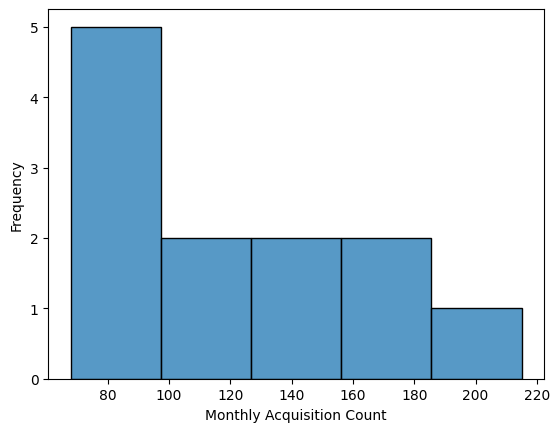

In [ ]:
# Histogram of monthly acquisition counts
ax = sbn.histplot(data=df_aqc, x='count')
ax.set_xlabel('Monthly Acquisition Count')
ax.set_ylabel('Frequency')

In [ ]:
#Average monthly expenditure
df_marketing_monthly = df_marketing.copy()
df_marketing_monthly['month'] = df_marketing_monthly['Date'].dt.month
df_marketing_monthly = df_marketing_monthly.groupby(by='month').agg({'Offline_Spend': 'mean', 'Online_Spend': 'mean'})
df_marketing_monthly = df_marketing_monthly.round(2)
df_marketing_monthly = df_marketing_monthly.reset_index()
df_marketing_monthly.rename(columns={'month':'Transaction_month'}, inplace=True)
df_marketing_monthly

,Transaction_month,Offline_Spend,Online_Spend
0,1,3116.13,1881.58
1,2,2903.57,1993.14
2,3,2370.97,1572.58
3,4,3200.00,2034.23
4,5,2112.90,1701.92
5,6,2683.33,1793.94
6,7,2177.42,1700.58
7,8,2758.06,1851.75
8,9,2766.67,1750.48
9,10,3016.13,1862.09


<Axes: xlabel='Transaction_month', ylabel='Expenditure'>

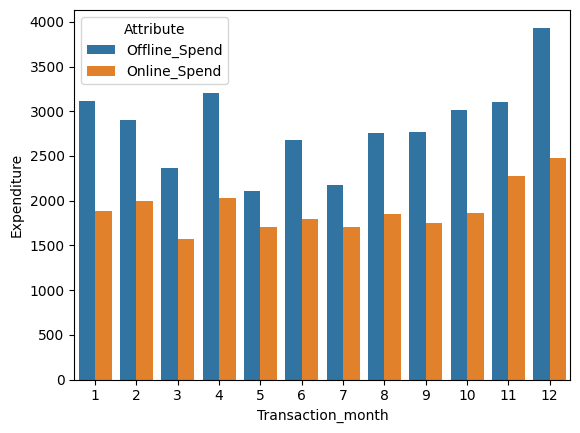

In [ ]:
df_temp = df_marketing_monthly.melt(id_vars='Transaction_month', value_vars=['Offline_Spend', 'Online_Spend'], var_name='Attribute', value_name='Expenditure')
sbn.barplot(data=df_temp, x = 'Transaction_month', y = 'Expenditure', hue = 'Attribute')

In [ ]:
df_discount_coupon_monthly = df_discount_coupon.copy()
df_discount_monthly = df_discount_coupon_monthly.groupby(by='Month').agg({'Discount_pct':'mean'})
df_discount_monthly = df_discount_monthly.round(2)
df_discount_monthly = df_discount_monthly.reset_index()
df_discount_monthly.rename(columns={'Month':'Transaction_month'}, inplace=True)
df_discount_monthly

,Transaction_month,Discount_pct
0,1,10.0
1,2,20.0
2,3,30.0
3,4,10.0
4,5,20.0
5,6,30.0
6,7,10.0
7,8,20.0
8,9,30.0
9,10,10.0


In [ ]:
# Trend plots for acquisition_count, offline_spend, online_spend, discount_pct
# Due to different scales, values are normalized for each column to bring them between 0 and 1
df_marketing_monthly_merge = pd.merge(df_marketing_monthly, df_aqc, how='inner', on='Transaction_month')
df_marketing_monthly_merge = pd.merge(df_marketing_monthly_merge, df_discount_monthly, how='inner', on='Transaction_month')
df_marketing_monthly_merge.set_index('Transaction_month', inplace=True)

# normalizing the values by divinding by max value for each column
df_marketing_monthly_merge = df_marketing_monthly_merge/df_marketing_monthly_merge.max()

df_marketing_monthly_merge.reset_index(inplace=True)
df_marketing_monthly_merge.rename(columns={'count':'Acquisition_count'}, inplace=True)
df_marketing_monthly_merge

,Transaction_month,Offline_Spend,Online_Spend,Acquisition_count,Discount_pct
0,1,0.791804,0.760991,1.000000,0.333333
1,2,0.737793,0.806110,0.446512,0.666667
2,3,0.602460,0.636018,0.823256,1.000000
3,4,0.813116,0.822729,0.758140,0.333333
4,5,0.536885,0.688329,0.520930,0.666667
5,6,0.681830,0.725545,0.637209,1.000000
6,7,0.553279,0.687787,0.437209,0.333333
7,8,0.700819,0.748926,0.627907,0.666667
8,9,0.703007,0.707968,0.362791,1.000000
9,10,0.766394,0.753108,0.404651,0.333333


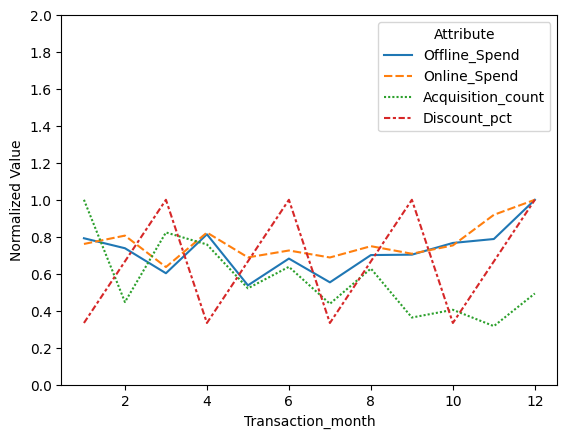

In [ ]:
# plotting seaborn lineplots after converting the dataframe to long format using melt
df_temp2 = df_marketing_monthly_merge.melt(id_vars='Transaction_month', value_vars=['Offline_Spend', 'Online_Spend', 'Acquisition_count', 'Discount_pct'], var_name='Attribute', value_name='Normalized Value')
ax = sbn.lineplot(data=df_temp2, x='Transaction_month', y='Normalized Value', hue='Attribute', style='Attribute')
ax.set_yticks([0,0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])

### **3. Identify periods with the strongest and weakest retention rates. What strategies could be implemented to improve retention during weaker months?**


**Solution 3a.**
- **High retention periods:** Month of July has the highest retention of 28%, June second highest with 22% and May, third highest with 18%.
- **Low retention periods:** Month of January has the lowest retention rate of 6%, February second lower with 10% and April third lowest with 11%.

**Solution 3b.**

**Strategies to improve retention during weak periods**
January has highest marketing spend, high acquisition count but lowest retention rate -
- Identify customers who are at risk of dropping and do targeted retetion campaign, such as recommend products based on past purchase profile
- Target customer segment based on the festivities of that period. For instance, target couples around the valentine's day
- Get feedback from the customes and address their grievances in the time-bound manner

In [ ]:
df_retention = df_online_sales[['CustomerID', 'Transaction_Date']]
df_retention['Transaction_month'] = df_retention['Transaction_Date'].dt.month
df_retention = pd.DataFrame(df_retention.groupby(by='Transaction_month')['CustomerID'].unique())
df_retention['Retention_rate'] = 0
#set(np.array(df_retention.loc[2, 'CustomerID'])).intersection(set(np.array(df_retention.loc[1, 'CustomerID'])))
for id in df_retention.index:
  if id==12: df_retention.loc[id, 'Retention_rate'] = df_retention.loc[id-1, 'Retention_rate']
  else:
    df_retention.loc[id, 'Retention_count'] = len(set(np.array(df_retention.loc[id, 'CustomerID'])).intersection(set(np.array(df_retention.loc[id+1, 'CustomerID']))))
    df_retention.loc[id, 'Retention_rate'] = df_retention.loc[id, 'Retention_count']/len(df_retention.loc[id, 'CustomerID'])

df_retention = df_retention.drop(index=12)
df_retention['Retention_count'] = df_retention['Retention_count'].astype(int)
df_retention['Retention_rate'] = df_retention['Retention_rate'].round(2)
# dropping the row corresponding to the last month
df_retention[['Retention_rate', 'Retention_count']]

,Retention_rate,Retention_count
Transaction_month,,
1,0.06,13
2,0.10,11
3,0.12,24
4,0.11,25
5,0.18,37
6,0.22,58
7,0.28,65
8,0.15,44
9,0.15,29


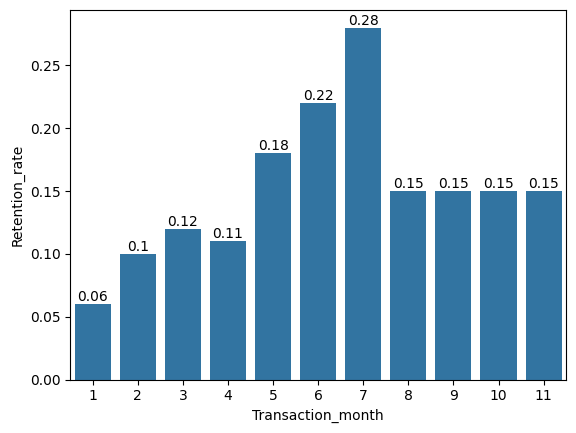

In [ ]:
ax = sbn.barplot(data=df_retention, x= df_retention.index, y='Retention_rate')
for bar in ax.containers:
    ax.bar_label(bar)

### **4. Analyze customer behavior during high-retention months and suggest ways to replicate this success throughout the year.**

**Solution 4.**

**Strategies to replicate success of high-retention months throughtout the year especially during the low retention months**

1. Product category: Apparel represents 40.70% in high-retention vs 29.98% in low-retention month and Nest-USA represents 22.85% in high-retention vs 31.43% in low-retention month.
- Recommendations:
  - Increase the inventory of Apparel, decrease the inventory of Nest-USA
  - Run marketing campaign for Apparel

2. Transaction value: High-retention months show 40.25 avg price vs 52.41 in low-retention months
- Recommendations:
  - Focus on affordable value products rather than high-end products
  - Introduce Apparel line for 35-45 value range

3. Delivery charges: High-retention months show avg delivery charge of 9.11 vs 13.04 in low-retention months
- Recommendations:
  - Reduce delivery cost during low retention months
  - Negotiate for better shipping rates
  - Optimize logistic routing during high-volume but low retention January month

In [ ]:
# creating base transactional dataset
base_df = df_online_sales.merge(df_customers, on='CustomerID', how='left')
print(base_df.columns)
# Step 2: Add discount information by month and category
base_df['Transaction_month'] = base_df['Transaction_Date'].dt.month
base_df = base_df.merge(df_discount_coupon,
                       left_on=['Transaction_month', 'Product_Category'],
                       right_on=['Month', 'Product_Category'], how='left')
base_df = base_df.drop(columns=['Month'])
print(base_df.columns)

base_df = base_df.merge(df_tax, on='Product_Category', how='left')
base_df.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months'],
      dtype='object')
Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months', 'Transaction_month', 'Coupon_Code', 'Discount_pct'],
      dtype='object')


Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months', 'Transaction_month', 'Coupon_Code', 'Discount_pct',
       'GST'],
      dtype='object')

In [ ]:
base_df['Discount_pct'] = base_df['Discount_pct'].fillna(0)

In [ ]:
def analyze_customer_behavior_patterns(df, high_months, low_months):
    """Comprehensive analysis of customer behavior during high vs low retention periods"""

    print("\n" + "="*70)
    print("CUSTOMER BEHAVIOR ANALYSIS: HIGH vs LOW RETENTION MONTHS")
    print("="*70)

    # Filter data for high and low retention periods
    high_retention_data = df[df['Transaction_month'].isin(high_months)]
    low_retention_data = df[df['Transaction_month'].isin(low_months)]

    # 1. PRODUCT CATEGORY ANALYSIS
    print("\n1. PRODUCT CATEGORY DISTRIBUTION:")
    high_categories = high_retention_data['Product_Category'].value_counts(normalize=True).head(5)
    low_categories = low_retention_data['Product_Category'].value_counts(normalize=True).head(5)

    print("HIGH RETENTION months - Top Categories:")
    for cat, pct in high_categories.items():
        print(f"   {cat}: {pct:.2%}")

    print("LOW RETENTION months - Top Categories:")
    for cat, pct in low_categories.items():
        print(f"   {cat}: {pct:.2%}")

    # 2. TRANSACTION VALUE ANALYSIS
    print("\n2. TRANSACTION VALUE PATTERNS:")
    high_avg_price = high_retention_data['Avg_Price'].mean()
    low_avg_price = low_retention_data['Avg_Price'].mean()
    high_quantity = high_retention_data['Quantity'].mean()
    low_quantity = low_retention_data['Quantity'].mean()

    print(f"HIGH RETENTION - Avg Price: {high_avg_price:.2f}, Avg Quantity: {high_quantity:.2f}")
    print(f"LOW RETENTION - Avg Price: {low_avg_price:.2f}, Avg Quantity: {low_quantity:.2f}")
    print(f"Price Difference: {((high_avg_price - low_avg_price) / low_avg_price * 100):+.1f}%")
    print(f"Quantity Difference: {((high_quantity - low_quantity) / low_quantity * 100):+.1f}%")

    # 3. DISCOUNT AND COUPON ANALYSIS
    print("\n3. DISCOUNT UTILIZATION PATTERNS:")
    high_coupon_rate = (high_retention_data['Coupon_Status'] == 'Used').mean()
    low_coupon_rate = (low_retention_data['Coupon_Status'] == 'Used').mean()
    high_delivery_cost = high_retention_data['Delivery_Charges'].mean()
    low_delivery_cost = low_retention_data['Delivery_Charges'].mean()

    print(f"HIGH RETENTION - Coupon Usage: {high_coupon_rate:.2%}")
    print(f"LOW RETENTION - Coupon Usage: {low_coupon_rate:.2%}")
    print(f"HIGH RETENTION - Avg Delivery Cost: {high_delivery_cost:.2f}")
    print(f"LOW RETENTION - Avg Delivery Cost: {low_delivery_cost:.2f}")

    # 4. CUSTOMER DEMOGRAPHICS ANALYSIS
    print("\n4. CUSTOMER DEMOGRAPHICS:")
    high_locations = high_retention_data['Location'].value_counts(normalize=True).head(3)
    low_locations = low_retention_data['Location'].value_counts(normalize=True).head(3)
    high_tenure = high_retention_data['Tenure_Months'].mean()
    low_tenure = low_retention_data['Tenure_Months'].mean()

    print(f"HIGH RETENTION - Avg Tenure: {high_tenure:.1f} months")
    print(f"LOW RETENTION - Avg Tenure: {low_tenure:.1f} months")
    print("HIGH RETENTION - Top Locations:", list(high_locations.head(3).index))
    print("LOW RETENTION - Top Locations:", list(low_locations.head(3).index))

    # 5. PURCHASE FREQUENCY ANALYSIS
    print("\n5. PURCHASE BEHAVIOR PATTERNS:")
    high_customers_freq = high_retention_data.groupby('CustomerID')['Transaction_ID'].count()
    low_customers_freq = low_retention_data.groupby('CustomerID')['Transaction_ID'].count()

    print(f"HIGH RETENTION - Avg Transactions per Customer: {high_customers_freq.mean():.2f}")
    print(f"LOW RETENTION - Avg Transactions per Customer: {low_customers_freq.mean():.2f}")


In [ ]:
high_retention_months = [5,6,7]
low_retention_months = [1,2,4]

In [ ]:
analyze_customer_behavior_patterns(base_df, high_retention_months, low_retention_months)


CUSTOMER BEHAVIOR ANALYSIS: HIGH vs LOW RETENTION MONTHS

1. PRODUCT CATEGORY DISTRIBUTION:
HIGH RETENTION months - Top Categories:
   Apparel: 40.70%
   Nest-USA: 22.85%
   Office: 12.61%
   Lifestyle: 6.53%
   Drinkware: 5.88%
LOW RETENTION months - Top Categories:
   Nest-USA: 31.43%
   Apparel: 29.98%
   Office: 14.62%
   Drinkware: 7.36%
   Lifestyle: 5.66%

2. TRANSACTION VALUE PATTERNS:
HIGH RETENTION - Avg Price: 40.25, Avg Quantity: 4.51
LOW RETENTION - Avg Price: 52.41, Avg Quantity: 5.39
Price Difference: -23.2%
Quantity Difference: -16.3%

3. DISCOUNT UTILIZATION PATTERNS:
HIGH RETENTION - Coupon Usage: 33.30%
LOW RETENTION - Coupon Usage: 34.02%
HIGH RETENTION - Avg Delivery Cost: 9.11
LOW RETENTION - Avg Delivery Cost: 13.04

4. CUSTOMER DEMOGRAPHICS:
HIGH RETENTION - Avg Tenure: 25.6 months
LOW RETENTION - Avg Tenure: 25.9 months
HIGH RETENTION - Top Locations: ['Chicago', 'California', 'New York']
LOW RETENTION - Top Locations: ['California', 'Chicago', 'New York']

5.

In [ ]:
def create_behavior_visualizations(df, high_months, low_months):
    """Create visualizations comparing high vs low retention behaviors"""

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    high_data = df[df['Transaction_month'].isin(high_months)]
    low_data = df[df['Transaction_month'].isin(low_months)]

    # 1. Average Price Distribution
    axes[0, 0].hist(high_data['Avg_Price'], alpha=0.7, label='High Retention', bins=30, color='green')
    axes[0, 0].hist(low_data['Avg_Price'], alpha=0.7, label='Low Retention', bins=30, color='red')
    axes[0, 0].set_title('Transaction Value Distribution')
    axes[0, 0].set_xlabel('Average Price')
    axes[0, 0].set_ylabel('Number of transactions')
    axes[0, 0].legend()

    # 2. Product Category Comparison
    high_cats = high_data['Product_Category'].value_counts().head(5)
    low_cats = low_data['Product_Category'].value_counts().head(5)

    x_pos = np.arange(len(high_cats))
    axes[0, 1].bar(x_pos - 0.2, high_cats.values, 0.4, label='High Retention', color='green', alpha=0.7)
    axes[0, 1].bar(x_pos + 0.2, [low_cats.get(cat, 0) for cat in high_cats.index], 0.4, label='Low Retention', color='red', alpha=0.7)
    axes[0, 1].set_title('Top Product Categories')
    axes[0, 1].set_ylabel('NUmber of transactions')
    axes[0, 1].set_xticks(x_pos)
    axes[0, 1].set_xticklabels(high_cats.index, rotation=45)
    axes[0, 1].legend()

    # 3. Quantity Distribution
    axes[0, 2].boxplot([high_data['Quantity'], low_data['Quantity']], labels=['High Retention', 'Low Retention'])
    axes[0, 2].set_title('Quantity per Transaction')

    # 4. Coupon Usage Comparison
    coupon_comparison = pd.DataFrame({
        'High Retention': high_data['Coupon_Status'].value_counts(normalize=True),
        'Low Retention': low_data['Coupon_Status'].value_counts(normalize=True)
    }).fillna(0)

    coupon_comparison.plot(kind='bar', ax=axes[1, 0])
    axes[1, 0].set_title('Coupon Usage Patterns')
    axes[1, 0].set_xticklabels(coupon_comparison.index, rotation=45)

    # 5. Location Distribution
    high_loc = high_data['Location'].value_counts(normalize=True).head(5)
    low_loc = low_data['Location'].value_counts(normalize=True).head(5)

    x_pos = np.arange(len(high_loc))
    axes[1, 1].bar(x_pos - 0.2, high_loc.values, 0.4, label='High Retention', color='green', alpha=0.7)
    axes[1, 1].bar(x_pos + 0.2, [low_loc.get(loc, 0) for loc in high_loc.index], 0.4, label='Low Retention', color='red', alpha=0.7)
    axes[1, 1].set_title('Geographic Distribution')
    axes[1, 1].set_xticks(x_pos)
    axes[1, 1].set_xticklabels(high_loc.index, rotation=45)
    axes[1, 1].legend()

    # 6. Customer Tenure Distribution
    axes[1, 2].hist(high_data['Tenure_Months'], alpha=0.7, label='High Retention', bins=20, color='green')
    axes[1, 2].hist(low_data['Tenure_Months'], alpha=0.7, label='Low Retention', bins=20, color='red')
    axes[1, 2].set_title('Customer Tenure Distribution')
    axes[1, 2].legend()

    plt.tight_layout()
    plt.show()

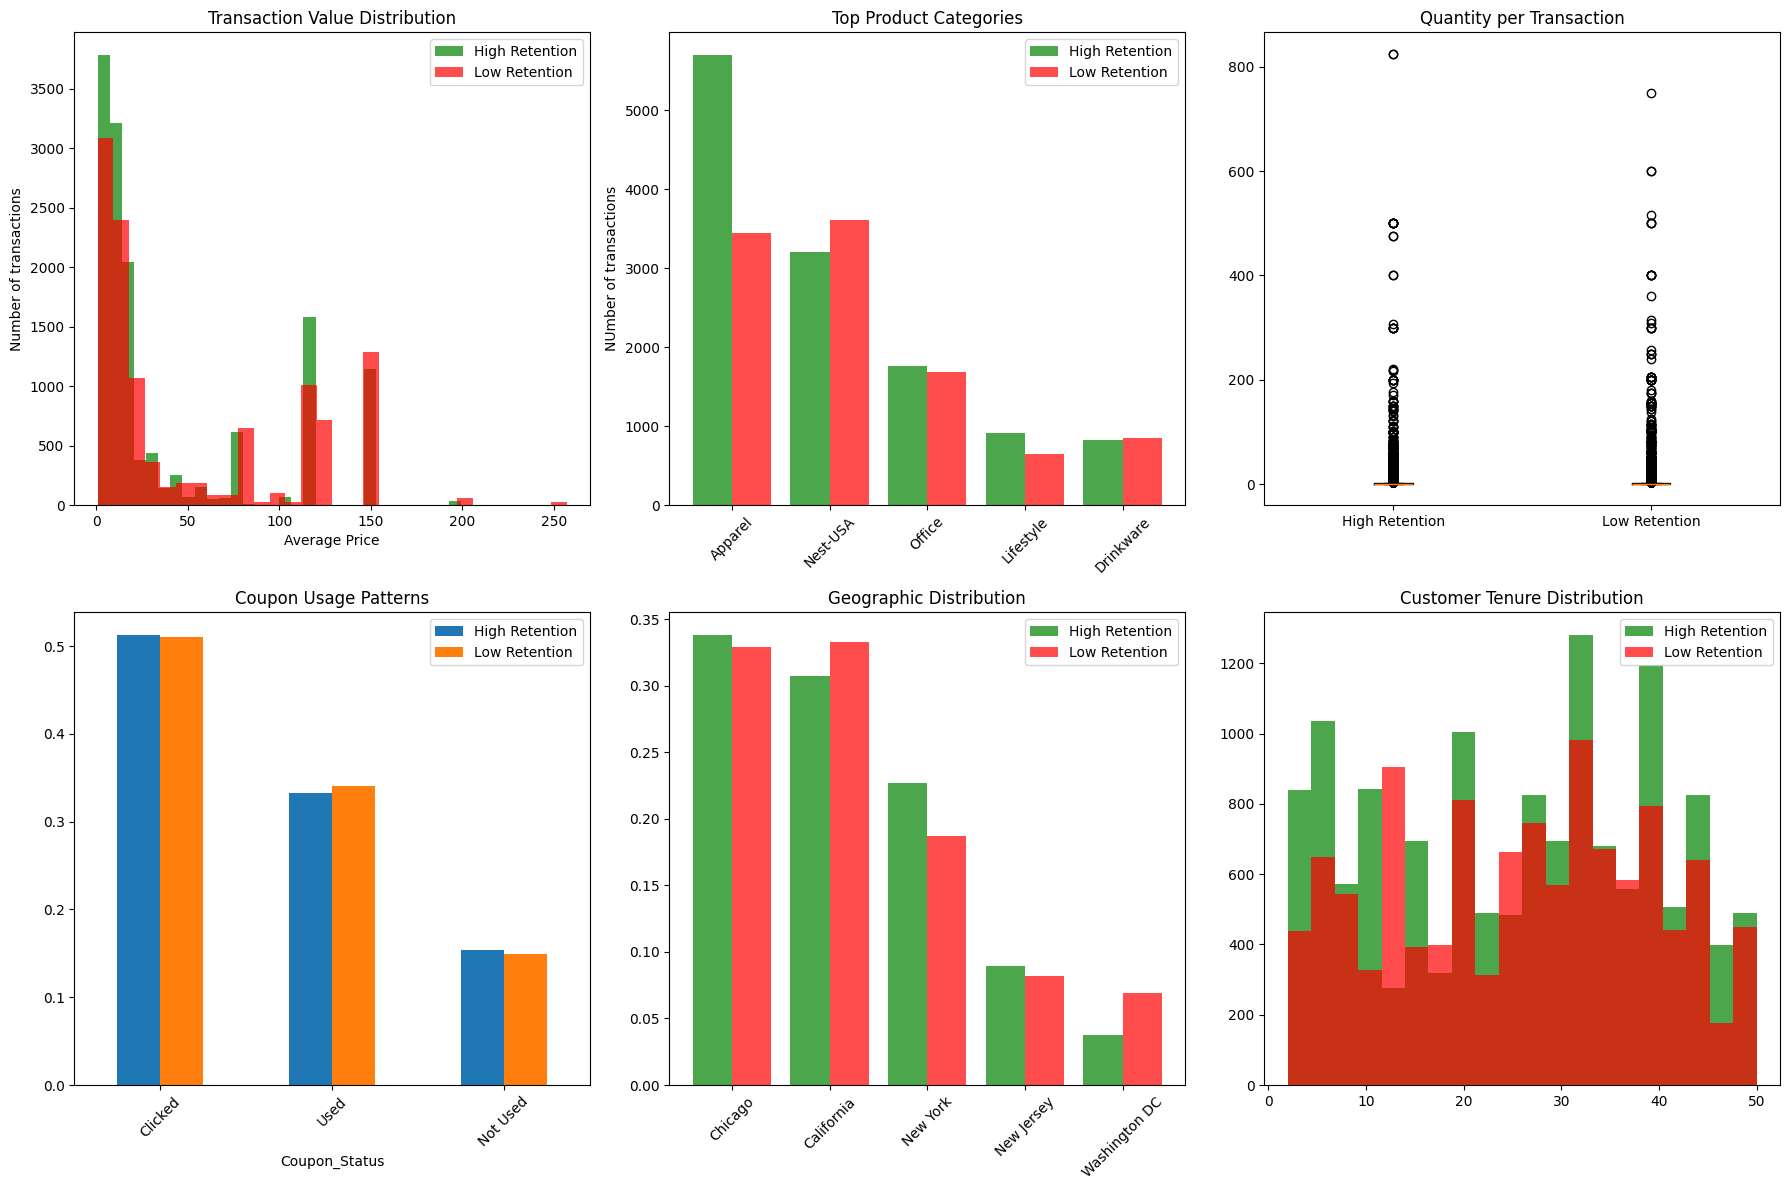

In [ ]:
create_behavior_visualizations(base_df, high_retention_months, low_retention_months)

### **5. Compare the revenue generated by new and existing customers month-over-month. What does this trend suggest about the balance between acquisition and retention efforts?**

**Solution 5.**

**Observations:**
Early Year: Acquisition-Dominated Strategy (Jan-Apr)
- January: Massive new customer revenue (468,882) with minimal existing customers

- February-March: Strong new customer revenue (306,843 and 279,624) but growing existing customer base (41,053 to 57,181)

- April: Continued strong new acquisition (266,811) with modest existing revenue (183,188)

Mid-Year Transition: Growing Retention Impact (May-Aug)
- May-June: New customer revenue declining (203,488 to 172,881) while existing customer revenue growing (115,069 to 116,950)

- July-August: Critical inflection point - existing customer revenue (254,868 and 217,630) approaches or exceeds new customer revenue (169,114 and 200,528)

Late Year: Retention-Heavy Model (Sep-Dec)
- September onward: Existing customer revenue consistently dominates new customer revenue

- December: Existing customers generate 233,259 vs new customers 203,273 - showing mature retention-focused business model

**Balance Assessment:**
- Current State: mature retention-focused with declining acquisition
- Strengths: Strong customer retention converting previous acquires into revenue drivers
- Weaknesses: Declining new customer acquisition threatening long-term growth
- Risk: Over-dependence on existing customers without sufficient new customer pipeline

In [ ]:
revenue_df = base_df.copy()
revenue_df['Discount_pct'] = base_df['Discount_pct']/100.0
revenue_df['revenue'] = revenue_df['Quantity']*revenue_df['Avg_Price']*(1-revenue_df['Discount_pct'])*(1+revenue_df['GST']) + revenue_df['Delivery_Charges']
revenue_df['revenue'] = revenue_df['revenue'].round(2)
revenue_df.head(3)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months,Transaction_month,Coupon_Code,Discount_pct,GST,revenue
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,1,ELEC10,0.1,0.1,158.67
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,1,ELEC10,0.1,0.1,158.67
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,M,Chicago,12,1,OFF10,0.1,0.1,8.53


In [ ]:
# Initializing new and existing customers from January month
new_customers      = revenue_df.loc[revenue_df['Transaction_month']==1, 'CustomerID'].unique()
existing_customers = np.array([]) #revenue_df.loc[revenue_df['Transaction_month']==1, 'CustomerID'].unique()
df_monthly_revenue = revenue_df[['Transaction_month']].drop_duplicates().reset_index(drop=True)
df_monthly_revenue['Existing'] = 0.0
df_monthly_revenue['New']      = 0.0

for month in range(1,13):
  new_customers =  new_customers if month==1 else revenue_df.loc[(revenue_df['Transaction_month']==month) & ~(revenue_df['CustomerID'].isin(existing_customers)), 'CustomerID'].unique()
  revenue_existing_customers = 0.0 if month==1 else revenue_df.loc[(revenue_df['Transaction_month']==month) & (revenue_df['CustomerID'].isin(existing_customers)), 'revenue'].sum()
  revenue_new_customers = revenue_df.loc[(revenue_df['Transaction_month']==month) & (revenue_df['CustomerID'].isin(new_customers)), 'revenue'].sum()
  df_monthly_revenue.loc[df_monthly_revenue['Transaction_month']==month, 'Existing'] = revenue_existing_customers
  df_monthly_revenue.loc[df_monthly_revenue['Transaction_month']==month, 'New'] = revenue_new_customers
  # updating the existing customers
  existing_customers = np.union1d(existing_customers, new_customers)

df_monthly_revenue


,Transaction_month,Existing,New
0,1,0.00,463881.87
1,2,41053.57,286842.68
2,3,57181.62,279623.65
3,4,183187.74,264810.53
4,5,115067.69,203488.43
5,6,116949.89,172881.15
6,7,254868.10,169113.53
7,8,217629.78,200528.36
8,9,188985.26,132142.88
9,10,209143.78,241694.69


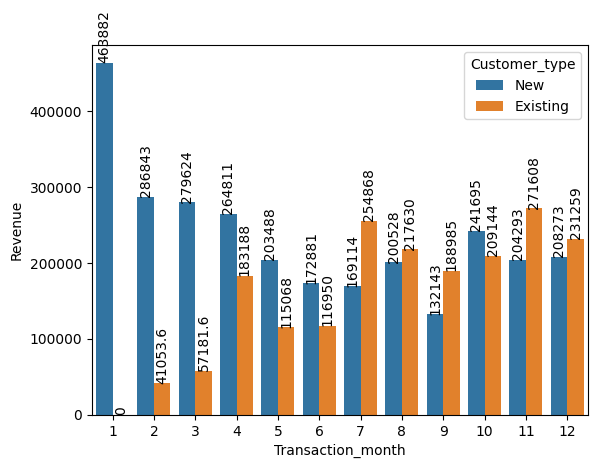

In [ ]:
df_temp3 = df_monthly_revenue.melt(id_vars='Transaction_month', value_vars=['New','Existing'], var_name='Customer_type', value_name='Revenue')
ax = sbn.barplot(data=df_temp3, x='Transaction_month', y='Revenue', hue='Customer_type')
for bar in ax.containers:
   ax.bar_label(bar, rotation=90)


### **6. Analyze the relationship between coupon usage and revenue generation. How can discount strategies be optimized to maximize revenue while maintaining profitability?**

**Solution 6**

Current Performance:

- Coupons drive 84.4% of total revenue (Clicked: 51.0% + Used: 33.4%)

- Minimal revenue difference per transaction: 87.93 (Used) vs 90.68 (No Coupon) = only -3.0%

- Extremely low discount cost: 0.17 per transaction suggests very conservative discounting

- High coupon engagement: 84.7% of transactions involve coupons (Clicked + Used)

Discount strategies optimization:
1. Increase Strategic Discounting (Revenue Maximization)

- Current Problem: Ultra-conservative discounting (0.17 per transaction) is leaving revenue on the table

- Optimization Actions:

    - Increase average discount from 0.17 to 2-5 per transaction to drive higher basket sizes

    - Test higher discount tiers (10-15%) since current impact is negligible

    - Convert "Clicked" customers to "Used" - 51% clicked but didn't use suggests friction in redemption process

2. Coupon Conversion Optimization

- Major Opportunity: 50.88% customers clicked coupons but 17% of them didn't complete usage

- Tactical Improvements:

    - Simplify coupon redemption process to convert more "Clicked" to "Used"

    - Add urgency messaging ("Limited time", "While supplies last")

    - Implement exit-intent coupons for cart abandonment recovery

    - A/B test coupon placement and messaging

In [ ]:
df_online_sales

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used
...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,2019-12-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked
52920,14410,48494,2019-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used
52921,14410,48495,2019-12-31,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used
52922,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked


In [ ]:
revenue_df.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months', 'Transaction_month', 'Coupon_Code', 'Discount_pct',
       'GST', 'revenue'],
      dtype='object')

In [ ]:
# 1. OVERALL REVENUE SHARE ANALYSIS
coupon_revenue_share = revenue_df.groupby('Coupon_Status')['revenue'].agg(['sum', 'count', 'mean']).reset_index()
coupon_revenue_share['revenue_percentage'] = (coupon_revenue_share['sum'] / revenue_df['revenue'].sum()) * 100
coupon_revenue_share['transaction_percentage'] = (coupon_revenue_share['count'] / len(revenue_df)) * 100

print("\nREVENUE SHARE BY COUPON USAGE:")
print(f"{'Coupon Status':<15} {'Total Revenue':<15} {'% of Revenue':<12} {'Transactions':<12} {'% of Txns':<10} {'Avg Revenue':<12}")
print("-" * 85)
for _, row in coupon_revenue_share.iterrows():
    print(f"{row['Coupon_Status']:<15} {row['sum']:>12,.2f} {row['revenue_percentage']:>10.1f}% {row['count']:>10,} {row['transaction_percentage']:>8.2f}% {row['mean']:>10,.2f}")


REVENUE SHARE BY COUPON USAGE:
Coupon Status   Total Revenue   % of Revenue Transactions % of Txns  Avg Revenue 
-------------------------------------------------------------------------------------
Clicked         2,406,211.86       51.0%     26,926    50.88%      89.36
Not Used          733,991.22       15.6%      8,094    15.29%      90.68
Used            1,574,304.75       33.4%     17,904    33.83%      87.93


In [ ]:
# 2. STATISTICAL SIGNIFICANCE TESTING
coupon_used_transactions = revenue_df[revenue_df['Coupon_Status'] == 'Used']['revenue']
no_coupon_transactions = revenue_df[revenue_df['Coupon_Status'] == 'Not Used']['revenue']

t_stat, p_value = ttest_ind(coupon_used_transactions, no_coupon_transactions)
avg_coupon_revenue = coupon_used_transactions.mean()
avg_no_coupon_revenue = no_coupon_transactions.mean()
revenue_difference = avg_coupon_revenue - avg_no_coupon_revenue
percent_difference = (revenue_difference / avg_no_coupon_revenue) * 100

print(f"\nSTATISTICAL ANALYSIS:")
print(f"Average Revenue (Coupon Used): {avg_coupon_revenue:,.2f}")
print(f"Average Revenue (No Coupon): {avg_no_coupon_revenue:,.2f}")
print(f"Difference: {revenue_difference:+,.2f} ({percent_difference:+.1f}%)")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Result: {'STATISTICALLY SIGNIFICANT' if p_value < 0.05 else 'NOT SIGNIFICANT'} (alpha=0.05)")



STATISTICAL ANALYSIS:
Average Revenue (Coupon Used): 87.93
Average Revenue (No Coupon): 90.68
Difference: -2.75 (-3.0%)
T-statistic: -1.3028
P-value: 0.192657
Result: NOT SIGNIFICANT (alpha=0.05)


In [ ]:
# 7. PROFITABILITY ANALYSIS
# Calculate profit margins (assuming cost implications of discounts)
coupon_used_data = revenue_df[revenue_df['Coupon_Status'] == 'Used']
no_coupon_data = revenue_df[revenue_df['Coupon_Status'] == 'Not Used']

# Estimate profit impact (simplified calculation)
coupon_gross_revenue = coupon_used_data['Quantity'] * coupon_used_data['Avg_Price'] * (1 + coupon_used_data['GST']/100)
coupon_discount_cost = coupon_gross_revenue * (coupon_used_data['Discount_pct']/100)
coupon_net_profit_loss = coupon_discount_cost.sum()

print(f"\nPROFITABILITY IMPACT:")
print(f"Total Discount Cost (Revenue Lost): {coupon_net_profit_loss:,.2f}")
print(f"Coupon Transactions Count: {len(coupon_used_data):,}")
print(f"Average Discount Cost per Coupon Transaction: {coupon_net_profit_loss/len(coupon_used_data):,.2f}")


PROFITABILITY IMPACT:
Total Discount Cost (Revenue Lost): 3,111.11
Coupon Transactions Count: 17,904
Average Discount Cost per Coupon Transaction: 0.17


### **7. Identify the top-performing products and analyze the factors driving their success. How can this insight inform inventory management and promotional strategies?**

**Solution 7**
- Top-Performing products:

  - Nest-USA dominates with 2,351,314 revenue (50% of total) despite serving only 1,260 customers, demonstrating exceptional per-customer value at 124.33 average price.
  - Apparel follows with 735,448 revenue serving 1,323 customers but at much lower 19.79 average price, indicating high-volume, low-margin success.

- Individual Product Stars
  
  Top 3 revenue drivers are all Nest security products:

  - Nest Cam Outdoor (GGOENEBQ078999): 64.71% customer penetration with 173.97 per transaction

  - Nest Learning Thermostat (GGOENEBJ079499): 64.85% customer penetration with 180.51 per transaction

  - Nest Cam Indoor (GGOENEBB078899): 64.92% customer penetration with 151.77 per transaction

These products achieve remarkable 64%+ customer penetration rates, meaning nearly 2 out of 3 customers purchase these items.


- Strategic recommendations

  - Prioritize Nest-USA inventory: Allocate 40-45% of inventory budget to this category (currently generates 50% revenue)

  - Maintain safety stock for top 3 products: High penetration rates (64%+) indicate consistent demand

  - Minimize discounting on top performers: Current 0.20% discount rate proves unnecessary for Nest products

  - Value-added promotions: Instead of price cuts, offer installation services, extended warranties

  - Premium Apparel development: High customer base (1,323) with low average price (19.79) shows upgrade potential

In [ ]:
print("TOP-PERFORMING PRODUCTS ANALYSIS")
print("=" * 50)

# 1. PRODUCT PERFORMANCE METRICS
product_performance = revenue_df.groupby(['Product_SKU', 'Product_Description', 'Product_Category']).agg({
    'Quantity': 'sum',
    'revenue': 'sum',
    'Transaction_ID': 'count',  # Number of transactions
    'Avg_Price': 'mean',
    'Discount_pct': 'mean',
    'CustomerID': 'nunique'  # Unique customers
}).reset_index()

product_performance.columns = ['Product_SKU', 'Product_Description', 'Product_Category',
                              'Total_Quantity', 'Total_Revenue', 'Total_Transactions',
                              'Avg_Price', 'Avg_Discount', 'Unique_Customers']
product_performance

TOP-PERFORMING PRODUCTS ANALYSIS


,Product_SKU,Product_Description,Product_Category,Total_Quantity,Total_Revenue,Total_Transactions,Avg_Price,Avg_Discount,Unique_Customers
0,GGOEA0CH077599,Android Hard Cover Journal,Notebooks & Journals,515,6470.62,16,13.331875,0.225000,14
1,GGOEAAAB034813,Android BTTF Cosmos Graphic Tee,Apparel,22,425.69,18,13.911111,0.227778,18
2,GGOEAAAB034814,Android BTTF Cosmos Graphic Tee,Apparel,57,866.28,43,12.171395,0.230233,40
3,GGOEAAAB034815,Android BTTF Cosmos Graphic Tee,Apparel,41,922.53,31,17.833226,0.209677,30
4,GGOEAAAB034816,Android BTTF Cosmos Graphic Tee,Apparel,24,551.95,22,16.775000,0.200000,22
...,...,...,...,...,...,...,...,...,...
1140,GGOEYOCR077399,YouTube RFID Journal,Notebooks & Journals,246,1908.46,24,9.697083,0.150000,24
1141,GGOEYOCR077799,YouTube Hard Cover Journal,Notebooks & Journals,1488,19507.89,61,12.706393,0.193443,58
1142,GGOEYOCR078099,YouTube Spiral Journal with Pen,Notebooks & Journals,445,3621.69,33,7.646364,0.151515,32
1143,GGOEYOLR018699,YouTube Leatherette Notebook Combo,Office,1443,10690.83,126,6.275397,0.198413,109


In [ ]:
# 2. PERFORMANCE RANKING COMPOSITE SCORE
# Normalize metrics to create composite performance score
product_performance['Quantity_Rank'] = product_performance['Total_Quantity'].rank(ascending=False)
product_performance['Revenue_Rank'] = product_performance['Total_Revenue'].rank(ascending=False)
product_performance['Transaction_Rank'] = product_performance['Total_Transactions'].rank(ascending=False)
product_performance['Customer_Rank'] = product_performance['Unique_Customers'].rank(ascending=False)

# Weighted composite score (40% revenue, 30% quantity, 20% transactions, 10% customers)
product_performance['Composite_Score'] = (
    product_performance['Revenue_Rank'] * 0.4 +
    product_performance['Quantity_Rank'] * 0.3 +
    product_performance['Transaction_Rank'] * 0.2 +
    product_performance['Customer_Rank'] * 0.1
)

# Sort by composite score (lower is better since we're using ranks)
top_products = product_performance.sort_values('Composite_Score').head(20)

print("\nTOP 20 PERFORMING PRODUCTS:")
print(f"{'Rank':<4} {'Product_SKU':<15} {'Category':<20} {'Revenue':<12} {'Quantity':<8} {'Customers':<9}")
print("-" * 85)
for idx, (_, row) in enumerate(top_products.iterrows(), 1):
    print(f"{idx:<4} {row['Product_SKU']:<15} {row['Product_Category']:<20} {row['Total_Revenue']:>9,.0f} {row['Total_Quantity']:>6,.0f} {row['Unique_Customers']:>7,.0f}")



TOP 20 PERFORMING PRODUCTS:
Rank Product_SKU     Category             Revenue      Quantity Customers
-------------------------------------------------------------------------------------
1    GGOENEBQ078999  Nest-USA               578,972  5,206     950
2    GGOENEBJ079499  Nest-USA               633,771  4,570     952
3    GGOENEBB078899  Nest-USA               490,218  4,402     953
4    GGOENEBQ079099  Nest-USA               198,504  2,683     642
5    GGOEGDHC018299  Drinkware               33,245  9,728     394
6    GGOEGBMJ013399  Bags                    36,465  7,321     302
7    GGOENEBQ079199  Nest-USA               195,517  2,670     567
8    GGOEGOLC014299  Office                  36,152  6,496     266
9    GGOEGFKQ020399  Office                  22,729  5,847     509
10   GGOEGGOA017399  Office                  18,226 16,234     284
11   GGOENEBQ084699  Nest-USA               185,670  1,368     542
12   GGOEGOCB017499  Office                  35,374  3,741     176
13   GG

In [ ]:
# 3. CATEGORY-WISE PERFORMANCE ANALYSIS
category_performance = revenue_df.groupby('Product_Category').agg({
    'Quantity': 'sum',
    'revenue': 'sum',
    'Transaction_ID': 'count',
    'CustomerID': 'nunique',
    'Avg_Price': 'mean',
    'Discount_pct': 'mean'
}).round(2)

category_performance = category_performance.sort_values('revenue', ascending=False)

print(f"\nCATEGORY PERFORMANCE RANKINGS:")
print(f"{'Category':<20} {'Total Revenue':<15} {'Total Quantity':<12} {'Avg Price':<10} {'Customers':<9}")
print("-" * 75)
for category, row in category_performance.iterrows():
    print(f"{category:<20} {row['revenue']:>12,.0f} {row['Quantity']:>10,.0f} {row['Avg_Price']:>8.2f} {row['CustomerID']:>7,.0f}")



CATEGORY PERFORMANCE RANKINGS:
Category             Total Revenue   Total Quantity Avg Price  Customers
---------------------------------------------------------------------------
Nest-USA                2,351,314     21,430   124.33   1,260
Apparel                   735,448     32,438    19.79   1,323
Nest                      439,979      2,837   194.22     516
Office                    343,998     88,383     3.77   1,103
Drinkware                 240,268     30,501    10.70     919
Bags                      168,853     15,273    29.83     728
Lifestyle                 114,558     24,881     3.86     817
Notebooks & Journals      109,368      9,556    11.76     383
Nest-Canada                65,546        469   157.24     205
Headgear                   53,454      3,533    15.88     425
Gift Cards                 17,575        206   111.36      77
Google                     13,169        575    16.45      89
Waze                       11,251      1,144     6.61     309
Backpacks    

In [ ]:
# 4. SUCCESS FACTOR ANALYSIS
print(f"\nSUCCESS FACTORS ANALYSIS:")

# Top 10 products detailed analysis
top_10_detailed = top_products.head(10)

print(f"Average metrics for TOP 10 products:")
print(f"Average Revenue per Product: {top_10_detailed['Total_Revenue'].mean():,.2f}")
print(f"Average Quantity per Product: {top_10_detailed['Total_Quantity'].mean():,.0f}")
print(f"Average Price Point: {top_10_detailed['Avg_Price'].mean():.2f}")
print(f"Average Discount Applied: {top_10_detailed['Avg_Discount'].mean():.2f}%")
print(f"Average Customers per Product: {top_10_detailed['Unique_Customers'].mean():.0f}")


SUCCESS FACTORS ANALYSIS:
Average metrics for TOP 10 products:
Average Revenue per Product: 224,379.92
Average Quantity per Product: 6,516
Average Price Point: 56.84
Average Discount Applied: 0.20%
Average Customers per Product: 582


In [ ]:
# 5. PRODUCT DESCRIPTION ANALYSIS (Success Patterns)
print(f"\nPRODUCT DESCRIPTION SUCCESS PATTERNS:")
top_descriptions = top_10_detailed['Product_Description'].tolist()
print("Top 10 Product Descriptions:")
for idx, desc in enumerate(top_descriptions, 1):
    print(f"{idx:2d}. {desc}")


PRODUCT DESCRIPTION SUCCESS PATTERNS:
Top 10 Product Descriptions:
 1. Nest Cam Outdoor Security Camera - USA
 2. Nest Learning Thermostat 3rd Gen-USA - Stainless Steel
 3. Nest Cam Indoor Security Camera - USA
 4. Nest Protect Smoke + CO White Battery Alarm-USA
 5. Google 22 oz Water Bottle
 6. Sport Bag
 7. Nest Protect Smoke + CO White Wired Alarm-USA
 8. Google Metallic Notebook Set
 9. Google Laptop and Cell Phone Stickers
10. Maze Pen


In [ ]:
# 6. CATEGORY CONCENTRATION ANALYSIS
top_categories = top_10_detailed['Product_Category'].value_counts()
print(f"\nTop 10 Products - Category Distribution:")
for category, count in top_categories.items():
    print(f"{category}: {count} products ({count/10*100:.1f}%)")

# 7. PRICE RANGE ANALYSIS
price_bins = [0, 25, 50, 100, 200, 1000]
price_labels = ['0-25', '25-50', '50-100', '100-200', '200+']
top_products['Price_Range'] = pd.cut(top_products['Avg_Price'], bins=price_bins, labels=price_labels, right=False)

price_range_analysis = top_products.groupby('Price_Range').agg({
    'Total_Revenue': 'sum',
    'Total_Quantity': 'sum',
    'Product_SKU': 'count'
}).round(2)

print(f"\nPrice Range Analysis (Top 20 Products):")
print(f"{'Price Range':<12} {'Products':<8} {'Total Revenue':<15} {'Total Quantity':<12}")
print("-" * 55)
for price_range, row in price_range_analysis.iterrows():
    if pd.notna(price_range):
        print(f"{price_range:<12} {row['Product_SKU']:>6} {row['Total_Revenue']:>12,.0f} {row['Total_Quantity']:>10,.0f}")

# 8. MONTHLY PERFORMANCE TRENDS
monthly_top_product_performance = revenue_df[
    revenue_df['Product_SKU'].isin(top_products['Product_SKU'].head(5))
].groupby(['Transaction_month', 'Product_SKU'])['revenue'].sum().unstack(fill_value=0)

print(f"\nMonthly Revenue Trends - Top 5 Products:")
print(monthly_top_product_performance.round(0))

# 9. CUSTOMER PENETRATION ANALYSIS
total_customers = revenue_df['CustomerID'].nunique()
print(f"\nCustomer Penetration Analysis (Top 10 Products):")
print(f"Total unique customers in dataset: {total_customers:,}")

for _, row in top_10_detailed.iterrows():
    penetration = (row['Unique_Customers'] / total_customers) * 100
    print(f"{row['Product_SKU']:<15}: {row['Unique_Customers']:>4,.0f} customers ({penetration:>5.2f}% penetration)")

# 10. INVENTORY VELOCITY ANALYSIS
# Calculate inventory turnover proxy (transactions per product)
inventory_velocity = top_products.head(10)[['Product_SKU', 'Total_Transactions', 'Total_Quantity', 'Total_Revenue']]
inventory_velocity['Revenue_per_Transaction'] = inventory_velocity['Total_Revenue'] / inventory_velocity['Total_Transactions']
inventory_velocity['Quantity_per_Transaction'] = inventory_velocity['Total_Quantity'] / inventory_velocity['Total_Transactions']

print(f"\nInventory Velocity Analysis (Top 10):")
print(f"{'Product_SKU':<15} {'Transactions':<12} {'Rev/Transaction':<15} {'Qty/Transaction':<15}")
print("-" * 65)
for _, row in inventory_velocity.iterrows():
    print(f"{row['Product_SKU']:<15} {row['Total_Transactions']:>10,.0f} {row['Revenue_per_Transaction']:>12.2f} {row['Quantity_per_Transaction']:>13.2f}")



Top 10 Products - Category Distribution:
Nest-USA: 5 products (50.0%)
Office: 3 products (30.0%)
Drinkware: 1 products (10.0%)
Bags: 1 products (10.0%)

Price Range Analysis (Top 20 Products):
Price Range  Products Total Revenue   Total Quantity
-------------------------------------------------------
0-25           13.0      322,508     71,411
25-50           0.0            0          0
50-100          3.0      488,644      6,444
100-200         4.0    1,888,631     15,546
200+            0.0            0          0

Monthly Revenue Trends - Top 5 Products:
Product_SKU        GGOEGDHC018299  GGOENEBB078899  GGOENEBJ079499  \
Transaction_month                                                   
1                          2058.0         65143.0        118631.0   
2                          1730.0         39427.0         62260.0   
3                          2581.0         40511.0         50719.0   
4                          2596.0         42921.0         44496.0   
5                    

### **8. Analyze the relationship between monthly marketing spend and revenue. Are there any months where marketing efforts yielded disproportionately high or low returns? How can marketing strategies be adjusted to improve ROI?**

**Solution 8**
Relationship Analysis
Strong Positive Correlation Confirmed:

Total marketing spend vs revenue: 0.6147 correlation (statistically significant, p=0.0334)

Online marketing shows strongest correlation: 0.6218 (p=0.0309) vs offline 0.5862 (p=0.0452)

Marketing investment consistently drives revenue with measurable impact

**Disproportionately High Return Months
Exceptional Performers:**

July leads with 252.7% ROI - 3.53 revenue per marketing dollar with optimal spend of 120K

January, October, November show 195-199% ROI - High efficiency cluster

High ROI months average 211.4% returns vs low ROI months at 128.3%

Key Success Factor: High performers maintain marketing spend below 155K while generating strong revenue

**Disproportionately Low Return Months
Underperformers:**

June worst at 115.8% ROI - Only $2.16 revenue per marketing dollar despite 134K spend

December inefficient at 121.3% ROI - Highest spend (199K) yields poor returns

February and September consistently underperform at 137-139% ROI

**Strategic Marketing Adjustments**
1. Budget Reallocation Strategy
- Increase July-style campaigns: Replicate 120K optimal spend model across other months
- Reduce December spend

2. Channel Mix Optimization
- Maintain current offline/online split (60%/40%) - both high and low ROI months show similar ratios
- Prioritize online marketing expansion: Stronger correlation (0.6218) suggests higher efficiency
- Test digital-first campaigns during historically strong months (Jan, Jul, Oct, Nov)

3. Immediate Implementation
- Q4 Strategy: Reduce December marketing by 50K, reallocate to January for next cycle
- Q2 Improvement: Analyze June's poor performance (134K spend, 290K revenue) vs July's success (120K spend, 424K revenue)

MARKETING SPEND vs REVENUE ANALYSIS
CORRELATION ANALYSIS:
Total Marketing Spend vs Revenue: 0.6147 (p-value: 0.0334)
Offline Spend vs Revenue: 0.5862 (p-value: 0.0452)
Online Spend vs Revenue: 0.6218 (p-value: 0.0309)
Statistical Significance:
  Total Marketing: ✅ Significant
  Offline Marketing: ✅ Significant
  Online Marketing: ✅ Significant

MONTHLY ROI ANALYSIS:
Month  Revenue      Marketing    ROI      Category    
------------------------------------------------------------
Jan      463,882   154,929  199.4% High ROI    
Feb      327,896   137,108  139.2% Low ROI     
Mar      336,805   122,250  175.5% Medium ROI  
Apr      447,998   157,027  185.3% Medium ROI  
May      318,556   118,260  169.4% Medium ROI  
Jun      289,831   134,318  115.8% Low ROI     
Jul      423,982   120,218  252.7% High ROI    
Aug      418,158   142,904  192.6% Medium ROI  
Sep      321,128   135,515  137.0% Low ROI     
Oct      450,838   151,225  198.1% High ROI    
Nov      475,901   161,145  195.3% 

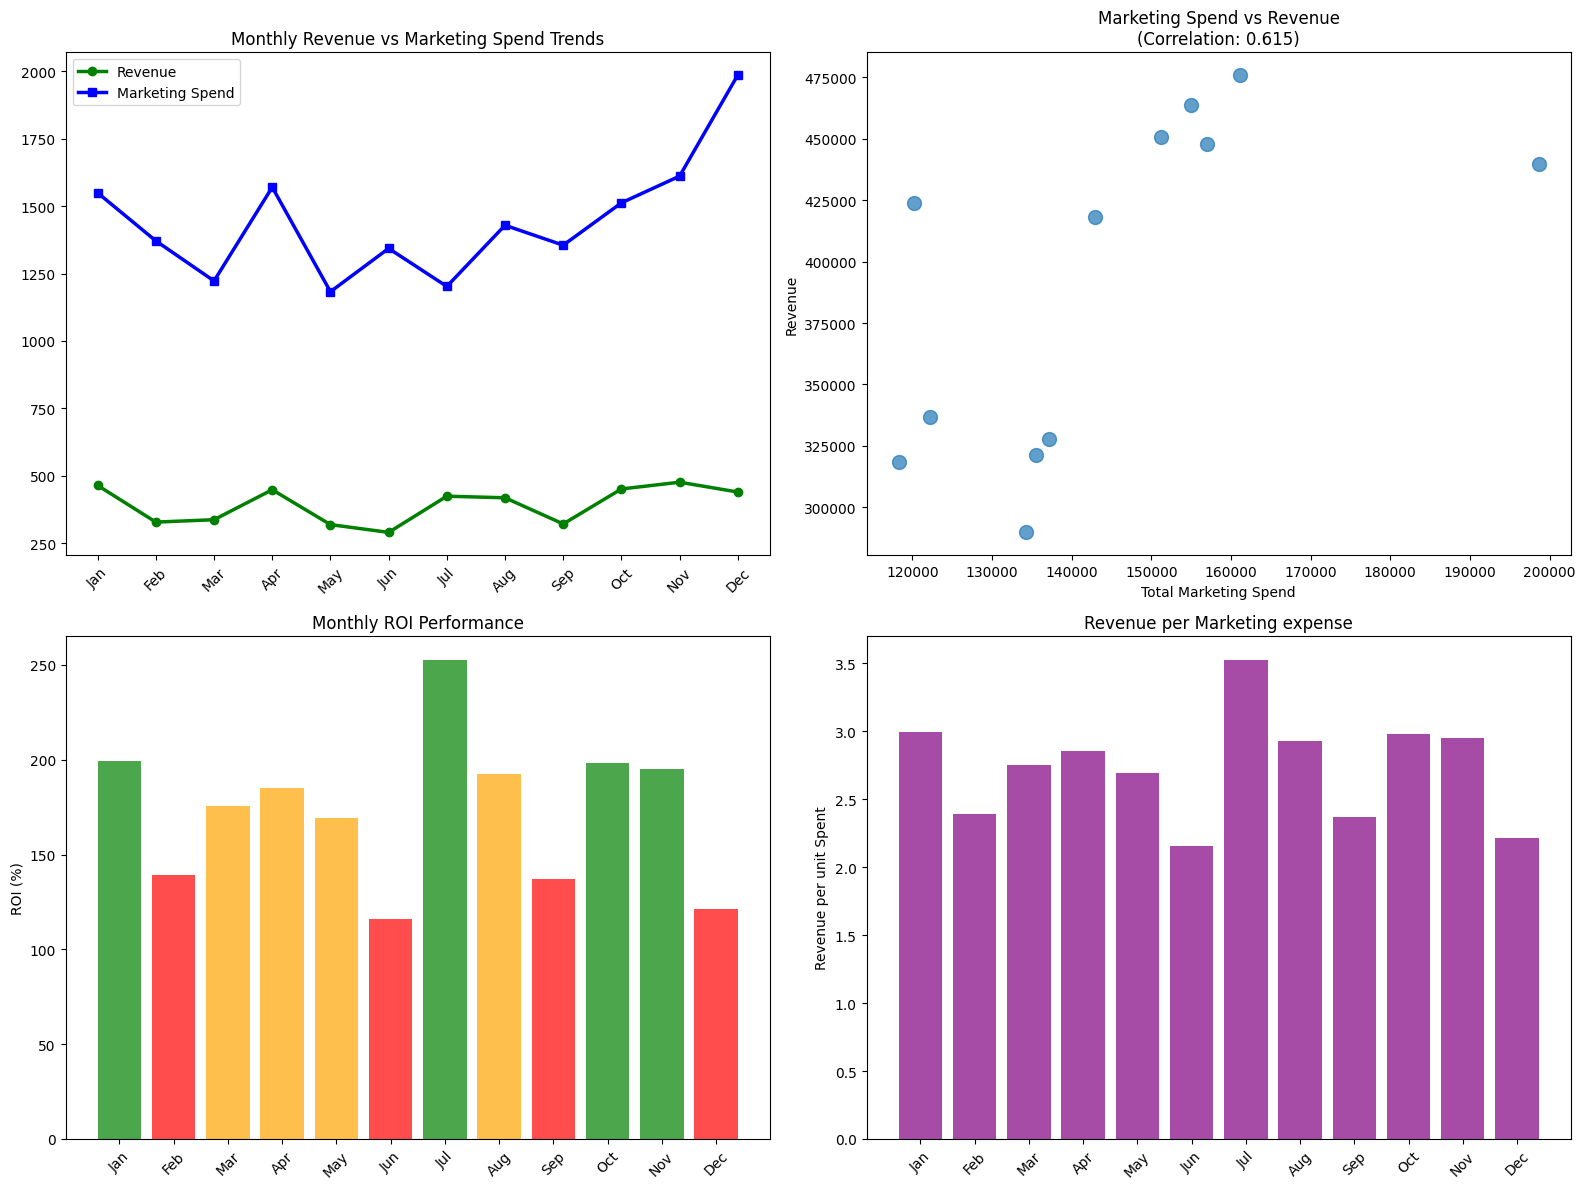

In [ ]:
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

print("MARKETING SPEND vs REVENUE ANALYSIS")
print("=" * 60)

# 1. PREPARE MONTHLY DATA
# Aggregate marketing spend data by month
monthly_marketing = df_marketing.groupby(df_marketing['Date'].dt.month).agg({
    'Offline_Spend': 'sum',
    'Online_Spend': 'sum'
}).reset_index()
monthly_marketing['Total_Marketing_Spend'] = monthly_marketing['Offline_Spend'] + monthly_marketing['Online_Spend']
monthly_marketing.rename(columns={'Date': 'Transaction_month'}, inplace=True)

# Aggregate revenue data by month
monthly_revenue = revenue_df.groupby('Transaction_month')['revenue'].sum().reset_index()

# Merge marketing spend and revenue data
monthly_analysis = monthly_marketing.merge(monthly_revenue, on='Transaction_month')

# 2. CALCULATE ROI FOR EACH MONTH
monthly_analysis['ROI'] = ((monthly_analysis['revenue'] - monthly_analysis['Total_Marketing_Spend']) * 100) / monthly_analysis['Total_Marketing_Spend']

# 3. CALCULATE CORRELATIONS
correlation_total, p_value_total = pearsonr(monthly_analysis['Total_Marketing_Spend'], monthly_analysis['revenue'])
correlation_offline, p_value_offline = pearsonr(monthly_analysis['Offline_Spend'], monthly_analysis['revenue'])
correlation_online, p_value_online = pearsonr(monthly_analysis['Online_Spend'], monthly_analysis['revenue'])

print("CORRELATION ANALYSIS:")
print(f"Total Marketing Spend vs Revenue: {correlation_total:.4f} (p-value: {p_value_total:.4f})")
print(f"Offline Spend vs Revenue: {correlation_offline:.4f} (p-value: {p_value_offline:.4f})")
print(f"Online Spend vs Revenue: {correlation_online:.4f} (p-value: {p_value_online:.4f})")

significance_total = "✅ Significant" if p_value_total < 0.05 else "❌ Not Significant"
significance_offline = "✅ Significant" if p_value_offline < 0.05 else "❌ Not Significant"
significance_online = "✅ Significant" if p_value_online < 0.05 else "❌ Not Significant"

print(f"Statistical Significance:")
print(f"  Total Marketing: {significance_total}")
print(f"  Offline Marketing: {significance_offline}")
print(f"  Online Marketing: {significance_online}")

# 4. IDENTIFY HIGH AND LOW ROI MONTHS
monthly_analysis['ROI_Category'] = pd.cut(monthly_analysis['ROI'],
                                        bins=[float('-inf'), monthly_analysis['ROI'].quantile(0.33),
                                              monthly_analysis['ROI'].quantile(0.67), float('inf')],
                                        labels=['Low ROI', 'Medium ROI', 'High ROI'])

print(f"\nMONTHLY ROI ANALYSIS:")
print(f"{'Month':<6} {'Revenue':<12} {'Marketing':<12} {'ROI':<8} {'Category':<12}")
print("-" * 60)
for _, row in monthly_analysis.iterrows():
    month_name = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'][int(row['Transaction_month'])-1]
    print(f"{month_name:<6} {row['revenue']:>9,.0f} {row['Total_Marketing_Spend']:>9,.0f} {row['ROI']:>6.1f}% {row['ROI_Category']:<12}")

# 5. EFFICIENCY METRICS
monthly_analysis['Revenue_per_Dollar'] = monthly_analysis['revenue'] / monthly_analysis['Total_Marketing_Spend']
monthly_analysis['Marketing_as_Percent_Revenue'] = (monthly_analysis['Total_Marketing_Spend'] / monthly_analysis['revenue']) * 100

print(f"\nMARKETING EFFICIENCY METRICS:")
print(f"{'Month':<6} {'Revenue/Dollar':<15} {'Marketing % of Rev':<18}")
print("-" * 45)
for _, row in monthly_analysis.iterrows():
    month_name = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'][int(row['Transaction_month'])-1]
    print(f"{month_name:<6} {row['Revenue_per_Dollar']:>12.2f} {row['Marketing_as_Percent_Revenue']:>14.2f}%")

# 6. IDENTIFY OUTLIERS AND BEST PRACTICES
high_roi_months = monthly_analysis[monthly_analysis['ROI_Category'] == 'High ROI']
low_roi_months = monthly_analysis[monthly_analysis['ROI_Category'] == 'Low ROI']

print(f"\nHIGH ROI MONTHS ANALYSIS:")
print(f"Months: {list(high_roi_months['Transaction_month'].values)}")
print(f"Average ROI: {high_roi_months['ROI'].mean():.1f}%")
print(f"Average Revenue per Marketing Dollar: {high_roi_months['Revenue_per_Dollar'].mean():.2f}")
offline_pct_high = (high_roi_months['Offline_Spend'].sum() / (high_roi_months['Offline_Spend'].sum() + high_roi_months['Online_Spend'].sum())) * 100
print(f"Offline/Online Split: {offline_pct_high:.1f}% offline, {100-offline_pct_high:.1f}% online")

print(f"\nLOW ROI MONTHS ANALYSIS:")
print(f"Months: {list(low_roi_months['Transaction_month'].values)}")
print(f"Average ROI: {low_roi_months['ROI'].mean():.1f}%")
print(f"Average Revenue per Marketing Dollar: {low_roi_months['Revenue_per_Dollar'].mean():.2f}")
offline_pct_low = (low_roi_months['Offline_Spend'].sum() / (low_roi_months['Offline_Spend'].sum() + low_roi_months['Online_Spend'].sum())) * 100
print(f"Offline/Online Split: {offline_pct_low:.1f}% offline, {100-offline_pct_low:.1f}% online")

# 7. SEASONAL PATTERNS ANALYSIS
monthly_analysis['Quarter'] = pd.cut(monthly_analysis['Transaction_month'],
                                   bins=[0, 3, 6, 9, 12],
                                   labels=['Q1', 'Q2', 'Q3', 'Q4'])

quarterly_analysis = monthly_analysis.groupby('Quarter').agg({
    'revenue': 'mean',
    'Total_Marketing_Spend': 'mean',
    'ROI': 'mean',
    'Revenue_per_Dollar': 'mean'
}).round(2)

print(f"\nQUARTERLY PERFORMANCE:")
print(f"{'Quarter':<8} {'Avg Revenue':<12} {'Avg Marketing':<12} {'Avg ROI':<8} {'/Marketing ':<12}")
print("-" * 60)
for quarter, row in quarterly_analysis.iterrows():
    print(f"{quarter:<8} {row['revenue']:>9,.0f} {row['Total_Marketing_Spend']:>9,.0f} {row['ROI']:>6.1f}% {row['Revenue_per_Dollar']:>9.2f}")

# 8. OPTIMIZATION RECOMMENDATIONS
best_roi_month = monthly_analysis.loc[monthly_analysis['ROI'].idxmax()]
worst_roi_month = monthly_analysis.loc[monthly_analysis['ROI'].idxmin()]

print(f"\nOPTIMIZATION INSIGHTS:")
print(f"Best ROI Month: {['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'][int(best_roi_month['Transaction_month'])-1]} ({best_roi_month['ROI']:.1f}% ROI)")
print(f"  - Marketing Spend: {best_roi_month['Total_Marketing_Spend']:,.0f}")
print(f"  - Revenue Generated: {best_roi_month['revenue']:,.0f}")
print(f"  - Offline/Online: {best_roi_month['Offline_Spend']:,.0f}/{best_roi_month['Online_Spend']:,.0f}")

print(f"\nWorst ROI Month: {['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'][int(worst_roi_month['Transaction_month'])-1]} ({worst_roi_month['ROI']:.1f}% ROI)")
print(f"  - Marketing Spend: {worst_roi_month['Total_Marketing_Spend']:,.0f}")
print(f"  - Revenue Generated: {worst_roi_month['revenue']:,.0f}")
print(f"  - Offline/Online: {worst_roi_month['Offline_Spend']:,.0f}/{worst_roi_month['Online_Spend']:,.0f}")

# 9. CREATE VISUALIZATIONS (Combined with above chart)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Monthly trends
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
axes[0,0].plot(months, monthly_analysis['revenue']/1000, marker='o', linewidth=2.5, label='Revenue', color='green')
axes[0,0].plot(months, monthly_analysis['Total_Marketing_Spend']/100, marker='s', linewidth=2.5, label='Marketing Spend', color='blue')
axes[0,0].set_title('Monthly Revenue vs Marketing Spend Trends')
axes[0,0].legend()
axes[0,0].tick_params(axis='x', rotation=45)

# Plot 2: Correlation scatter
axes[0,1].scatter(monthly_analysis['Total_Marketing_Spend'], monthly_analysis['revenue'], alpha=0.7, s=100)
axes[0,1].set_title(f'Marketing Spend vs Revenue\n(Correlation: {correlation_total:.3f})')
axes[0,1].set_xlabel('Total Marketing Spend')
axes[0,1].set_ylabel('Revenue')

# Plot 3: ROI by month
colors = ['red' if cat == 'Low ROI' else 'orange' if cat == 'Medium ROI' else 'green' for cat in monthly_analysis['ROI_Category']]
axes[1,0].bar(months, monthly_analysis['ROI'], color=colors, alpha=0.7)
axes[1,0].set_title('Monthly ROI Performance')
axes[1,0].set_ylabel('ROI (%)')
axes[1,0].tick_params(axis='x', rotation=45)

# Plot 4: Revenue per dollar
axes[1,1].bar(months, monthly_analysis['Revenue_per_Dollar'], color='purple', alpha=0.7)
axes[1,1].set_title('Revenue per Marketing expense')
axes[1,1].set_ylabel('Revenue per unit Spent')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### **9. Evaluate the effectiveness of marketing campaigns by comparing marketing spend to revenue generated. Are there opportunities to reallocate resources for better results?**

**High Efficiency Months:** Jan, Apr, Jul, Aug, Oct, Nov (6 months)

Average marketing spend: 33.1% of revenue

Average revenue per dollar: 3.04

**Low Efficiency Months:** Feb, Mar, May, Jun, Sep, Dec (6 months)

Average marketing spend: 41.5% of revenue

Average revenue per dollar: 2.43

**Resource Reallocation Opportunity:**

Current low-efficiency spend: 846,099
Optimal spend (using high-efficiency rate): 672,433
Potential savings: 173,666
Efficiency improvement: 20.5%

BEST: July - 28.4% spend ratio
WORST: June - 46.3% spend ratio

**Strategic Recommendations:**
- Reduce spend in low-efficiency months
- Reallocate saved resources to high-efficiency periods

MARKETING CAMPAIGN EFFECTIVENESS EVALUATION
MONTHLY MARKETING EFFECTIVENESS:
Month  Revenue      Marketing    Spend %  Rev/Dollar Efficiency  
---------------------------------------------------------------------------
Jan       463,882    154,929   33.4%     2.99 High Efficiency
Feb       327,896    137,108   41.8%     2.39 Low Efficiency
Mar       336,805    122,250   36.3%     2.76 Low Efficiency
Apr       447,998    157,027   35.1%     2.85 High Efficiency
May       318,556    118,260   37.1%     2.69 Low Efficiency
Jun       289,831    134,318   46.3%     2.16 Low Efficiency
Jul       423,982    120,218   28.4%     3.53 High Efficiency
Aug       418,158    142,904   34.2%     2.93 High Efficiency
Sep       321,128    135,515   42.2%     2.37 Low Efficiency
Oct       450,838    151,225   33.5%     2.98 High Efficiency
Nov       475,901    161,145   33.9%     2.95 High Efficiency
Dec       439,531    198,649   45.2%     2.21 Low Efficiency

HIGH EFFICIENCY MONTHS:
Average Marketing 

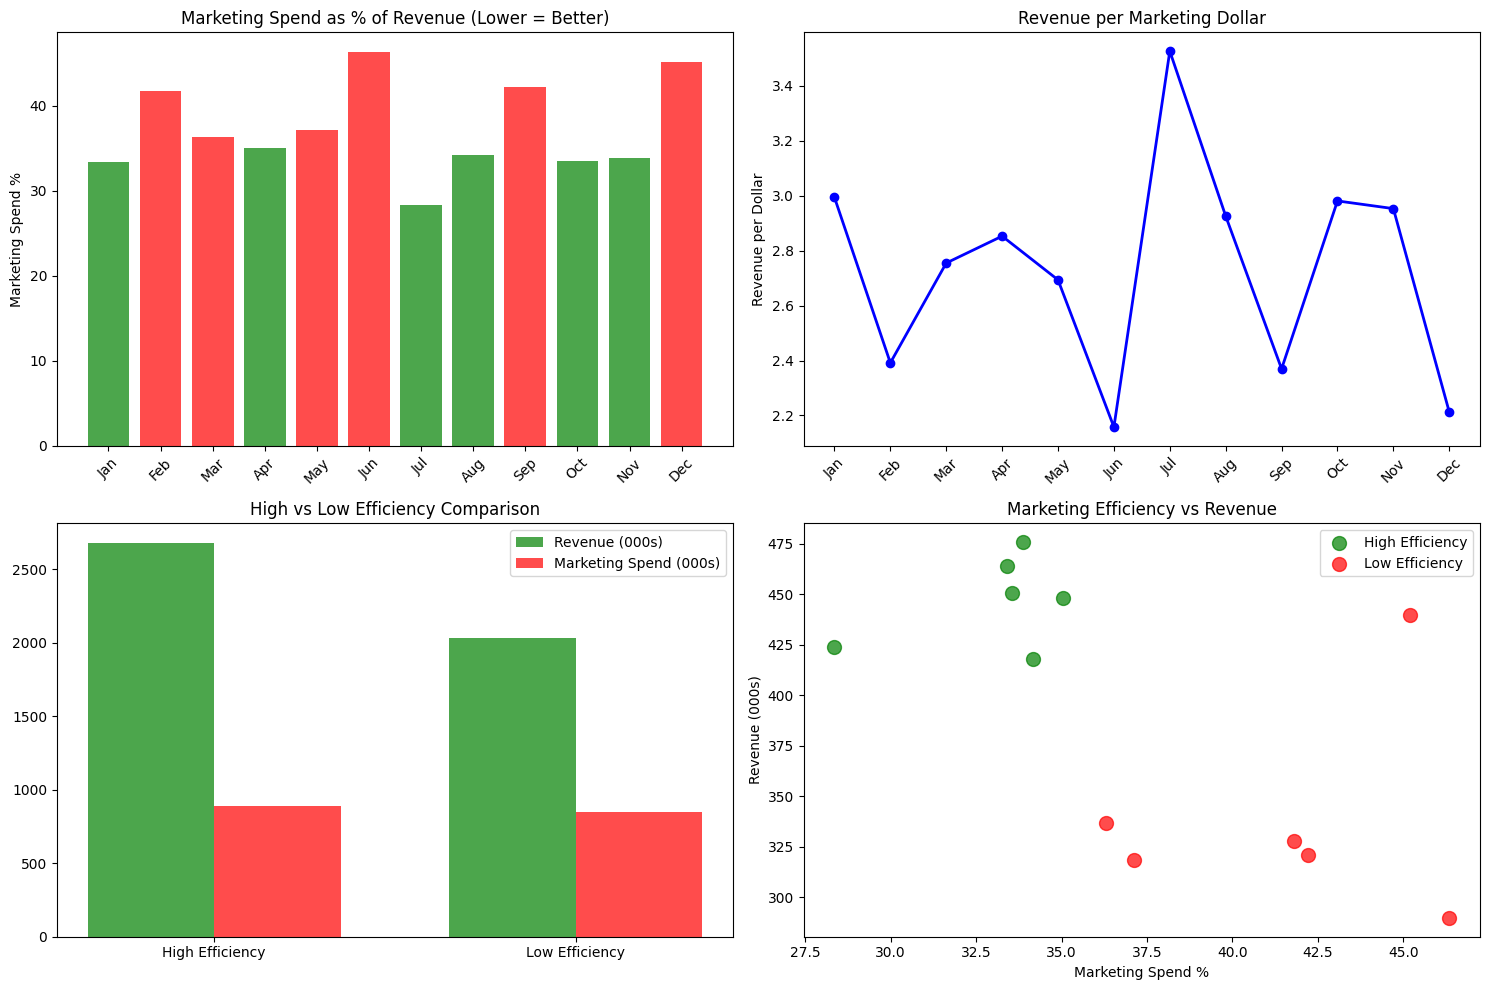

In [ ]:
print("MARKETING CAMPAIGN EFFECTIVENESS EVALUATION")
print("=" * 55)

# Aggregate marketing spend and revenue by month
monthly_marketing = df_marketing.groupby(df_marketing['Date'].dt.month).agg({
    'Offline_Spend': 'sum',
    'Online_Spend': 'sum'
}).reset_index()
monthly_marketing['Total_Marketing_Spend'] = monthly_marketing['Offline_Spend'] + monthly_marketing['Online_Spend']
monthly_marketing.rename(columns={'Date': 'Transaction_month'}, inplace=True)

monthly_revenue = revenue_df.groupby('Transaction_month')['revenue'].sum().reset_index()
monthly_analysis = monthly_marketing.merge(monthly_revenue, on='Transaction_month')

# Calculate marketing efficiency metrics
monthly_analysis['Marketing_Spend_Pct'] = (monthly_analysis['Total_Marketing_Spend'] * 100) / monthly_analysis['revenue']
monthly_analysis['Revenue_per_Marketing_Dollar'] = monthly_analysis['revenue'] / monthly_analysis['Total_Marketing_Spend']

# Identify high and low efficiency periods
efficiency_median = monthly_analysis['Marketing_Spend_Pct'].median()
monthly_analysis['Efficiency_Category'] = monthly_analysis['Marketing_Spend_Pct'].apply(
    lambda x: 'High Efficiency' if x < efficiency_median else 'Low Efficiency'
)

print("MONTHLY MARKETING EFFECTIVENESS:")
print(f"{'Month':<6} {'Revenue':<12} {'Marketing':<12} {'Spend %':<8} {'Rev/Dollar':<10} {'Efficiency':<12}")
print("-" * 75)
for _, row in monthly_analysis.iterrows():
    month_name = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'][int(row['Transaction_month'])-1]
    print(f"{month_name:<6} {row['revenue']:>10,.0f} {row['Total_Marketing_Spend']:>10,.0f} {row['Marketing_Spend_Pct']:>6.1f}% {row['Revenue_per_Marketing_Dollar']:>8.2f} {row['Efficiency_Category']:<12}")

# High vs Low efficiency analysis
high_efficiency = monthly_analysis[monthly_analysis['Efficiency_Category'] == 'High Efficiency']
low_efficiency = monthly_analysis[monthly_analysis['Efficiency_Category'] == 'Low Efficiency']

print(f"\nHIGH EFFICIENCY MONTHS:")
print(f"Average Marketing Spend %: {high_efficiency['Marketing_Spend_Pct'].mean():.1f}%")
print(f"Average Revenue/Dollar: {high_efficiency['Revenue_per_Marketing_Dollar'].mean():.2f}")
print(f"Months: {list(high_efficiency['Transaction_month'].values)}")

print(f"\nLOW EFFICIENCY MONTHS:")
print(f"Average Marketing Spend %: {low_efficiency['Marketing_Spend_Pct'].mean():.1f}%")
print(f"Average Revenue/Dollar: {low_efficiency['Revenue_per_Marketing_Dollar'].mean():.2f}")
print(f"Months: {list(low_efficiency['Transaction_month'].values)}")

# Resource reallocation opportunities
current_low_efficiency_spend = low_efficiency['Total_Marketing_Spend'].sum()
optimal_spend_for_low_months = (low_efficiency['revenue'].sum() * high_efficiency['Marketing_Spend_Pct'].mean()) / 100
potential_savings = current_low_efficiency_spend - optimal_spend_for_low_months

print(f"\nRESOURCE REALLOCATION OPPORTUNITIES:")
print(f"Current low-efficiency spend: {current_low_efficiency_spend:,.0f}")
print(f"Optimal spend (using high-efficiency rate): {optimal_spend_for_low_months:,.0f}")
print(f"Potential savings: {potential_savings:,.0f}")
print(f"Efficiency improvement: {(potential_savings/current_low_efficiency_spend)*100:.1f}%")

# Best and worst months
best_month = monthly_analysis.loc[monthly_analysis['Marketing_Spend_Pct'].idxmin()]
worst_month = monthly_analysis.loc[monthly_analysis['Marketing_Spend_Pct'].idxmax()]

print(f"\nBEST: July - {best_month['Marketing_Spend_Pct']:.1f}% spend ratio")
print(f"WORST: June - {worst_month['Marketing_Spend_Pct']:.1f}% spend ratio")

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Marketing spend percentage by month
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
colors = ['green' if cat == 'High Efficiency' else 'red' for cat in monthly_analysis['Efficiency_Category']]
axes[0,0].bar(months, monthly_analysis['Marketing_Spend_Pct'], color=colors, alpha=0.7)
axes[0,0].set_title('Marketing Spend as % of Revenue (Lower = Better)')
axes[0,0].set_ylabel('Marketing Spend %')
axes[0,0].tick_params(axis='x', rotation=45)

# Plot 2: Revenue per marketing dollar
axes[0,1].plot(months, monthly_analysis['Revenue_per_Marketing_Dollar'], marker='o', linewidth=2, color='blue')
axes[0,1].set_title('Revenue per Marketing Dollar')
axes[0,1].set_ylabel('Revenue per Dollar')
axes[0,1].tick_params(axis='x', rotation=45)

# Plot 3: High vs Low efficiency comparison
efficiency_summary = monthly_analysis.groupby('Efficiency_Category').agg({
    'revenue': 'sum',
    'Total_Marketing_Spend': 'sum'
})
categories = ['High Efficiency', 'Low Efficiency']
revenue_vals = [efficiency_summary.loc['High Efficiency', 'revenue']/1000,
                efficiency_summary.loc['Low Efficiency', 'revenue']/1000]
spend_vals = [efficiency_summary.loc['High Efficiency', 'Total_Marketing_Spend']/1000,
              efficiency_summary.loc['Low Efficiency', 'Total_Marketing_Spend']/1000]

x = np.arange(len(categories))
width = 0.35
axes[1,0].bar(x - width/2, revenue_vals, width, label='Revenue (000s)', color='green', alpha=0.7)
axes[1,0].bar(x + width/2, spend_vals, width, label='Marketing Spend (000s)', color='red', alpha=0.7)
axes[1,0].set_title('High vs Low Efficiency Comparison')
axes[1,0].set_xticks(x)
axes[1,0].set_xticklabels(categories)
axes[1,0].legend()

# Plot 4: Efficiency scatter plot
high_eff_data = monthly_analysis[monthly_analysis['Efficiency_Category'] == 'High Efficiency']
low_eff_data = monthly_analysis[monthly_analysis['Efficiency_Category'] == 'Low Efficiency']
axes[1,1].scatter(high_eff_data['Marketing_Spend_Pct'], high_eff_data['revenue']/1000,
                 color='green', label='High Efficiency', s=100, alpha=0.7)
axes[1,1].scatter(low_eff_data['Marketing_Spend_Pct'], low_eff_data['revenue']/1000,
                 color='red', label='Low Efficiency', s=100, alpha=0.7)
axes[1,1].set_title('Marketing Efficiency vs Revenue')
axes[1,1].set_xlabel('Marketing Spend %')
axes[1,1].set_ylabel('Revenue (000s)')
axes[1,1].legend()

plt.tight_layout()
plt.show()


### **10. Segment customers into groups such as Premium, Gold, Silver, and Standard. What targeted strategies can be developed for each segment to improve retention and revenue? (Use RFM segmentation techniques)**

**Solution 10**

**TARGETED STRATEGIES BY SEGMENT:**

PREMIUM CUSTOMERS (400 customers, 63.5% revenue):
- VIP treatment with dedicated account managers
- Exclusive early access to new products
- Premium loyalty rewards and personalized offers
- High-touch retention campaigns

GOLD CUSTOMERS (332 customers, 22.8% revenue):
- Loyalty program with tiered benefits
- Cross-sell and upsell campaigns
- Regular engagement with personalized content
- Upgrade path to Premium segment

SILVER CUSTOMERS (340 customers, 9.7% revenue):
- Win-back campaigns for inactive customers
- Frequency-building promotions
- Educational content to increase engagement
- Targeted discount offers

STANDARD CUSTOMERS (396 customers, 4.0% revenue):
- Re-engagement campaigns
- Value-focused promotions
- Survey for feedback and improvement
- Basic retention efforts

RFM CUSTOMER SEGMENTATION ANALYSIS
CUSTOMER SEGMENT SUMMARY:
Segment    Count  %     Rev%   Recency  Frequency Monetary   RFM Score
---------------------------------------------------------------------------
Premium    400    27.2  63.5   64.7     80.8      7479       10.9     
Gold       332    22.6  22.8   140.3    36.3      3241       8.5      
Silver     340    23.2  9.7    155.0    16.9      1344       6.5      
Standard   396    27.0  4.0    222.5    7.1       480        4.2      

DETAILED SEGMENT ANALYSIS:

PREMIUM:
  Customers: 400 (27.2%)
  Avg Recency: 64.7 days
  Avg Frequency: 80.8 purchases
  Avg Monetary: 7479
  Revenue Share: 63.5%

GOLD:
  Customers: 332 (22.6%)
  Avg Recency: 140.3 days
  Avg Frequency: 36.3 purchases
  Avg Monetary: 3241
  Revenue Share: 22.8%

SILVER:
  Customers: 340 (23.2%)
  Avg Recency: 155.0 days
  Avg Frequency: 16.9 purchases
  Avg Monetary: 1344
  Revenue Share: 9.7%

STANDARD:
  Customers: 396 (27.0%)
  Avg Recency: 222.5 days
  Avg Frequen

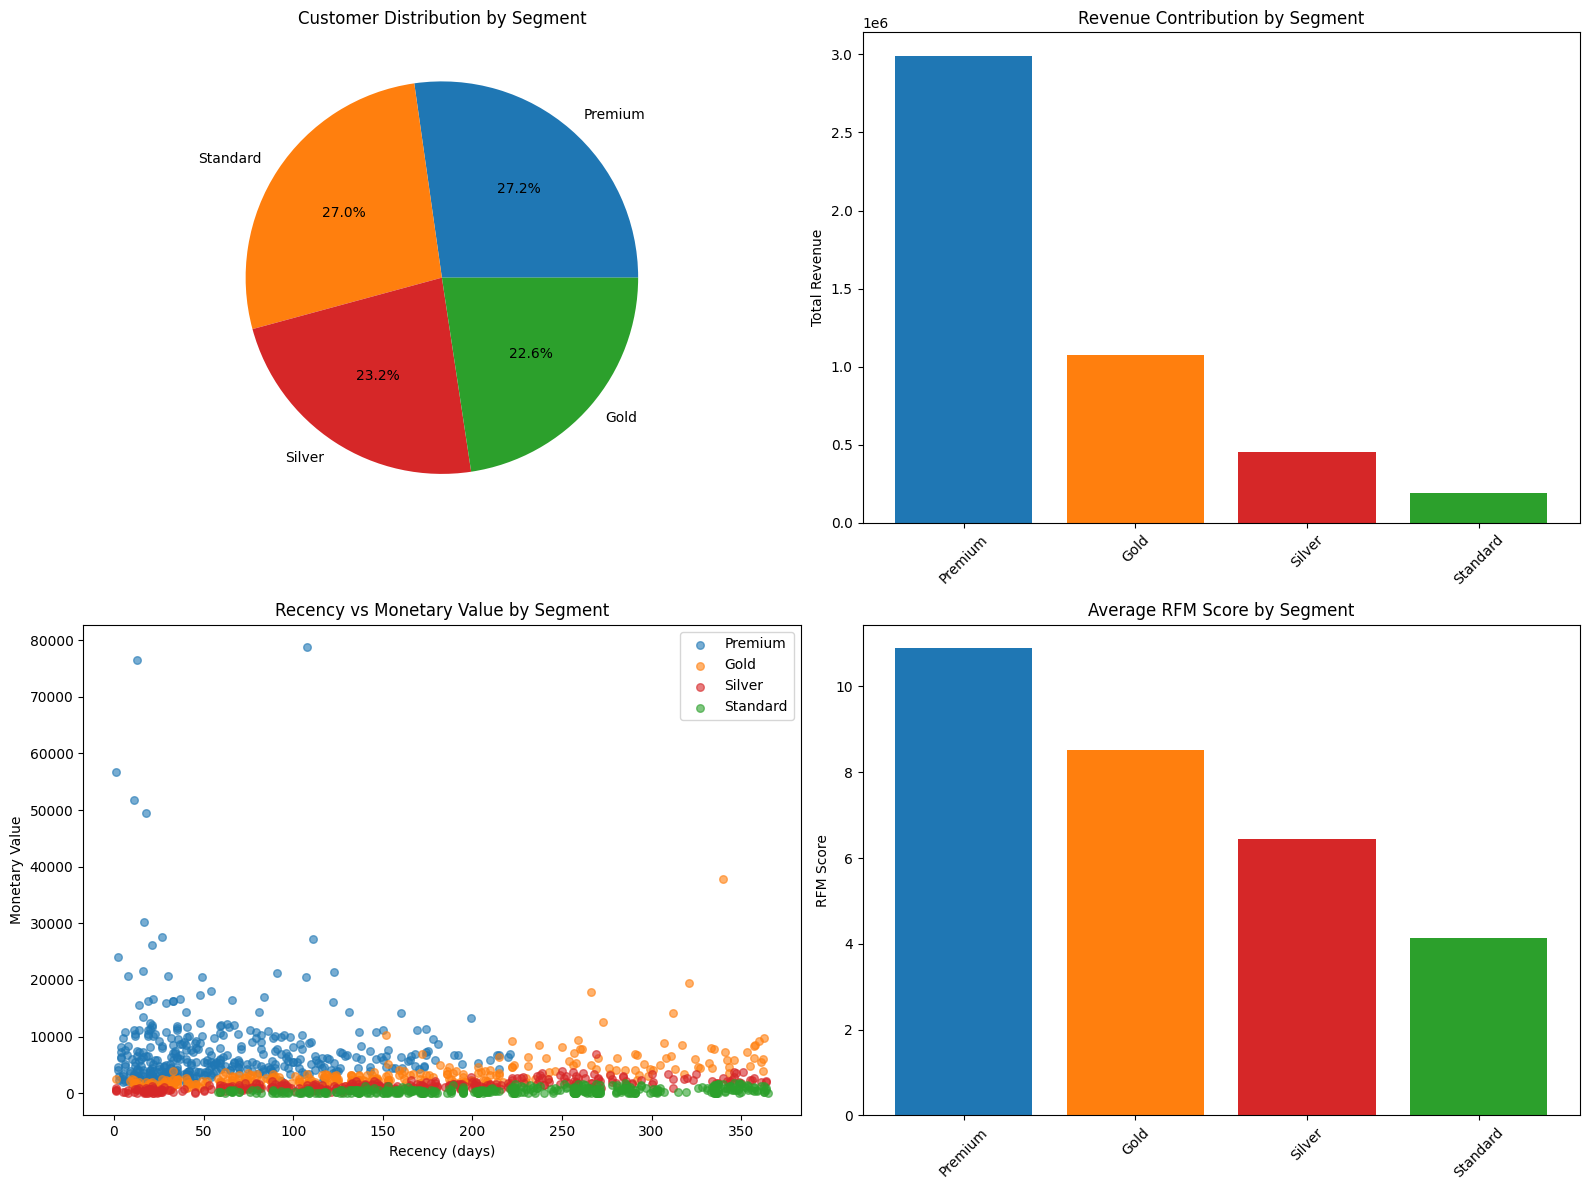

In [ ]:
print("RFM CUSTOMER SEGMENTATION ANALYSIS")
print("=" * 50)

# Calculate RFM metrics for each customer
analysis_date = revenue_df['Transaction_Date'].max() + pd.Timedelta(days=1)

# Calculate RFM metrics
rfm = revenue_df.groupby('CustomerID').agg({
    'Transaction_Date': lambda x: (analysis_date - x.max()).days,  # Recency
    'Transaction_ID': 'count',  # Frequency
    'revenue': 'sum'  # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Create RFM scores using quartiles
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])  # Lower recency = higher score
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])  # Higher frequency = higher score
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])  # Higher monetary = higher score

# Convert to numeric for calculations
rfm['R_Score'] = rfm['R_Score'].astype(int)
rfm['F_Score'] = rfm['F_Score'].astype(int)
rfm['M_Score'] = rfm['M_Score'].astype(int)

# Calculate combined RFM score
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score_Numeric'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']

# Define customer segments based on RFM scores
def segment_customers(row):
    if row['RFM_Score_Numeric'] >= 10:
        return 'Premium'
    elif row['RFM_Score_Numeric'] >= 8:
        return 'Gold'
    elif row['RFM_Score_Numeric'] >= 6:
        return 'Silver'
    else:
        return 'Standard'

rfm['Customer_Segment'] = rfm.apply(segment_customers, axis=1)

# Segment analysis
segment_summary = rfm.groupby('Customer_Segment').agg({
    'CustomerID': 'count',
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'RFM_Score_Numeric': 'mean'
}).round(2)

segment_summary.columns = ['Customer_Count', 'Avg_Recency', 'Avg_Frequency', 'Avg_Monetary', 'Avg_RFM_Score']
segment_summary['Customer_Percentage'] = (segment_summary['Customer_Count'] / rfm.shape[0] * 100).round(1)

# Calculate revenue contribution
total_revenue = rfm['Monetary'].sum()
revenue_by_segment = rfm.groupby('Customer_Segment')['Monetary'].sum()
segment_summary['Revenue_Contribution'] = (revenue_by_segment / total_revenue * 100).round(1)

print("CUSTOMER SEGMENT SUMMARY:")
print(f"{'Segment':<10} {'Count':<6} {'%':<5} {'Rev%':<6} {'Recency':<8} {'Frequency':<9} {'Monetary':<10} {'RFM Score':<9}")
print("-" * 75)
for segment in ['Premium', 'Gold', 'Silver', 'Standard']:
    data = segment_summary.loc[segment]
    print(f"{segment:<10} {data['Customer_Count']:<6.0f} {data['Customer_Percentage']:<5.1f} {data['Revenue_Contribution']:<6.1f} {data['Avg_Recency']:<8.1f} {data['Avg_Frequency']:<9.1f} {data['Avg_Monetary']:<10.0f} {data['Avg_RFM_Score']:<9.1f}")

# Detailed segment characteristics
print(f"\nDETAILED SEGMENT ANALYSIS:")
for segment in ['Premium', 'Gold', 'Silver', 'Standard']:
    segment_data = rfm[rfm['Customer_Segment'] == segment]
    revenue_share = segment_data['Monetary'].sum() / total_revenue * 100
    print(f"\n{segment.upper()}:")
    print(f"  Customers: {len(segment_data)} ({len(segment_data)/len(rfm)*100:.1f}%)")
    print(f"  Avg Recency: {segment_data['Recency'].mean():.1f} days")
    print(f"  Avg Frequency: {segment_data['Frequency'].mean():.1f} purchases")
    print(f"  Avg Monetary: {segment_data['Monetary'].mean():.0f}")
    print(f"  Revenue Share: {revenue_share:.1f}%")

# Strategic recommendations
print(f"\nTARGETED STRATEGIES BY SEGMENT:")

premium_data = rfm[rfm['Customer_Segment'] == 'Premium']
gold_data = rfm[rfm['Customer_Segment'] == 'Gold']
silver_data = rfm[rfm['Customer_Segment'] == 'Silver']
standard_data = rfm[rfm['Customer_Segment'] == 'Standard']

# Revenue and customer value analysis
print(f"\nREVENUE IMPACT ANALYSIS:")
print(f"Premium customers generate {premium_data['Monetary'].mean()/standard_data['Monetary'].mean():.1f}x more revenue than Standard")
print(f"Top 2 segments (Premium + Gold) represent {(len(premium_data) + len(gold_data))/len(rfm)*100:.1f}% of customers but {(premium_data['Monetary'].sum() + gold_data['Monetary'].sum())/total_revenue*100:.1f}% of revenue")

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Customer distribution pie chart
segment_counts = rfm['Customer_Segment'].value_counts()
colors = ['#1f77b4', '#ff7f0e', '#d62728', '#2ca02c']  # Premium, Gold, Silver, Standard
axes[0,0].pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', colors=colors)
axes[0,0].set_title('Customer Distribution by Segment')

# 2. Revenue contribution by segment
revenue_contrib = rfm.groupby('Customer_Segment')['Monetary'].sum().sort_values(ascending=False)
axes[0,1].bar(revenue_contrib.index, revenue_contrib.values, color=colors)
axes[0,1].set_title('Revenue Contribution by Segment')
axes[0,1].set_ylabel('Total Revenue')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. RFM scatter plot (Recency vs Monetary)
segment_colors = {'Premium': '#1f77b4', 'Gold': '#ff7f0e', 'Silver': '#d62728', 'Standard': '#2ca02c'}
for segment in segment_colors:
    segment_data = rfm[rfm['Customer_Segment'] == segment]
    axes[1,0].scatter(segment_data['Recency'], segment_data['Monetary'],
                     c=segment_colors[segment], label=segment, alpha=0.6, s=30)
axes[1,0].set_title('Recency vs Monetary Value by Segment')
axes[1,0].set_xlabel('Recency (days)')
axes[1,0].set_ylabel('Monetary Value')
axes[1,0].legend()

# 4. Average RFM scores by segment
avg_scores = rfm.groupby('Customer_Segment')['RFM_Score_Numeric'].mean().sort_values(ascending=False)
axes[1,1].bar(avg_scores.index, avg_scores.values, color=colors)
axes[1,1].set_title('Average RFM Score by Segment')
axes[1,1].set_ylabel('RFM Score')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### **11. Analyze the revenue contribution of each customer segment. How can the company focus its efforts on high-value segments while nurturing lower-value segments?**

**Revenue Contribution Analysis:** Strategic Focus Areas
Based on the calculations, the revenue contribution reveals a stark Pareto distribution where Premium customers (27.2% of customers) generate 63.5% of total revenue, while Standard customers (27% of customers) contribute only 4% of revenue.

**High-Value Segment Focus (86.3% Revenue)**

Premium Customers (63.5% revenue contribution):
- Average value: 23x higher than Standard customers (7,479 vs 480)
- Strategic approach: White-glove service, dedicated account management, exclusive product access
- Retention priority: Maximum investment to prevent churn of these ultra-high-value customers

Gold Customers (22.8% revenue contribution):
- Average value: 10x higher than Standard customers
- Strategic approach: Loyalty programs, tier upgrade incentives, personalized cross-selling
- Growth focus: Convert to Premium through enhanced service experiences
- Nurturing Lower-Value Segments (13.7% Revenue)

Silver Customers (9.7% revenue contribution):
- Upgrade potential: 3x current Standard customer value
- Strategic approach: Win-back campaigns, frequency-building promotions, tier advancement programs
- Investment rationale: Higher conversion potential than Standard segment

Standard Customers (4% revenue contribution):
- Challenge: Lowest engagement and spending
- Strategic approach: Reactivation programs, basic value propositions, cost-effective automation
- Resource allocation: Minimal investment due to low ROI potential

Resource Allocation Strategy
Optimal Budget Distribution:

- 60% marketing budget → Premium/Gold segments (86.3% revenue impact)
- 40% marketing budget → Silver/Standard segments (13.7% revenue but growth potential)

This approach maximizes ROI by heavily investing in proven high-value segments while maintaining cost-effective nurturing programs for lower-tier customers with upgrade potential.

REVENUE CONTRIBUTION BY SEGMENT:
Segment    Customers  %      Revenue      %      Avg/Customer Multiplier
--------------------------------------------------------------------------------
Premium    400        27.2   2991553      63.5   7479         2.3       x
Gold       332        22.6   1076147      22.8   3241         1.0       x
Silver     340        23.2   456882       9.7    1344         0.4       x
Standard   396        27.0   189926       4.0    480          0.1       x

PARETO ANALYSIS:
Top 30% customers (Premium+Gold) = 86.3% revenue
Bottom 40% customers (Standard) = 4.0% revenue

STRATEGIC FOCUS:

HIGH-VALUE SEGMENT STRATEGIES (86.3% revenue):
- Premium: White-glove service, exclusive benefits, retention priority
- Gold: Loyalty programs, upgrade incentives, cross-sell focus

GROWTH SEGMENT STRATEGIES (13.7% revenue):
- Silver: Win-back campaigns, frequency building, tier upgrades
- Standard: Reactivation programs, value propositions, basic engagement

RESOURCE ALLOCATION:
6

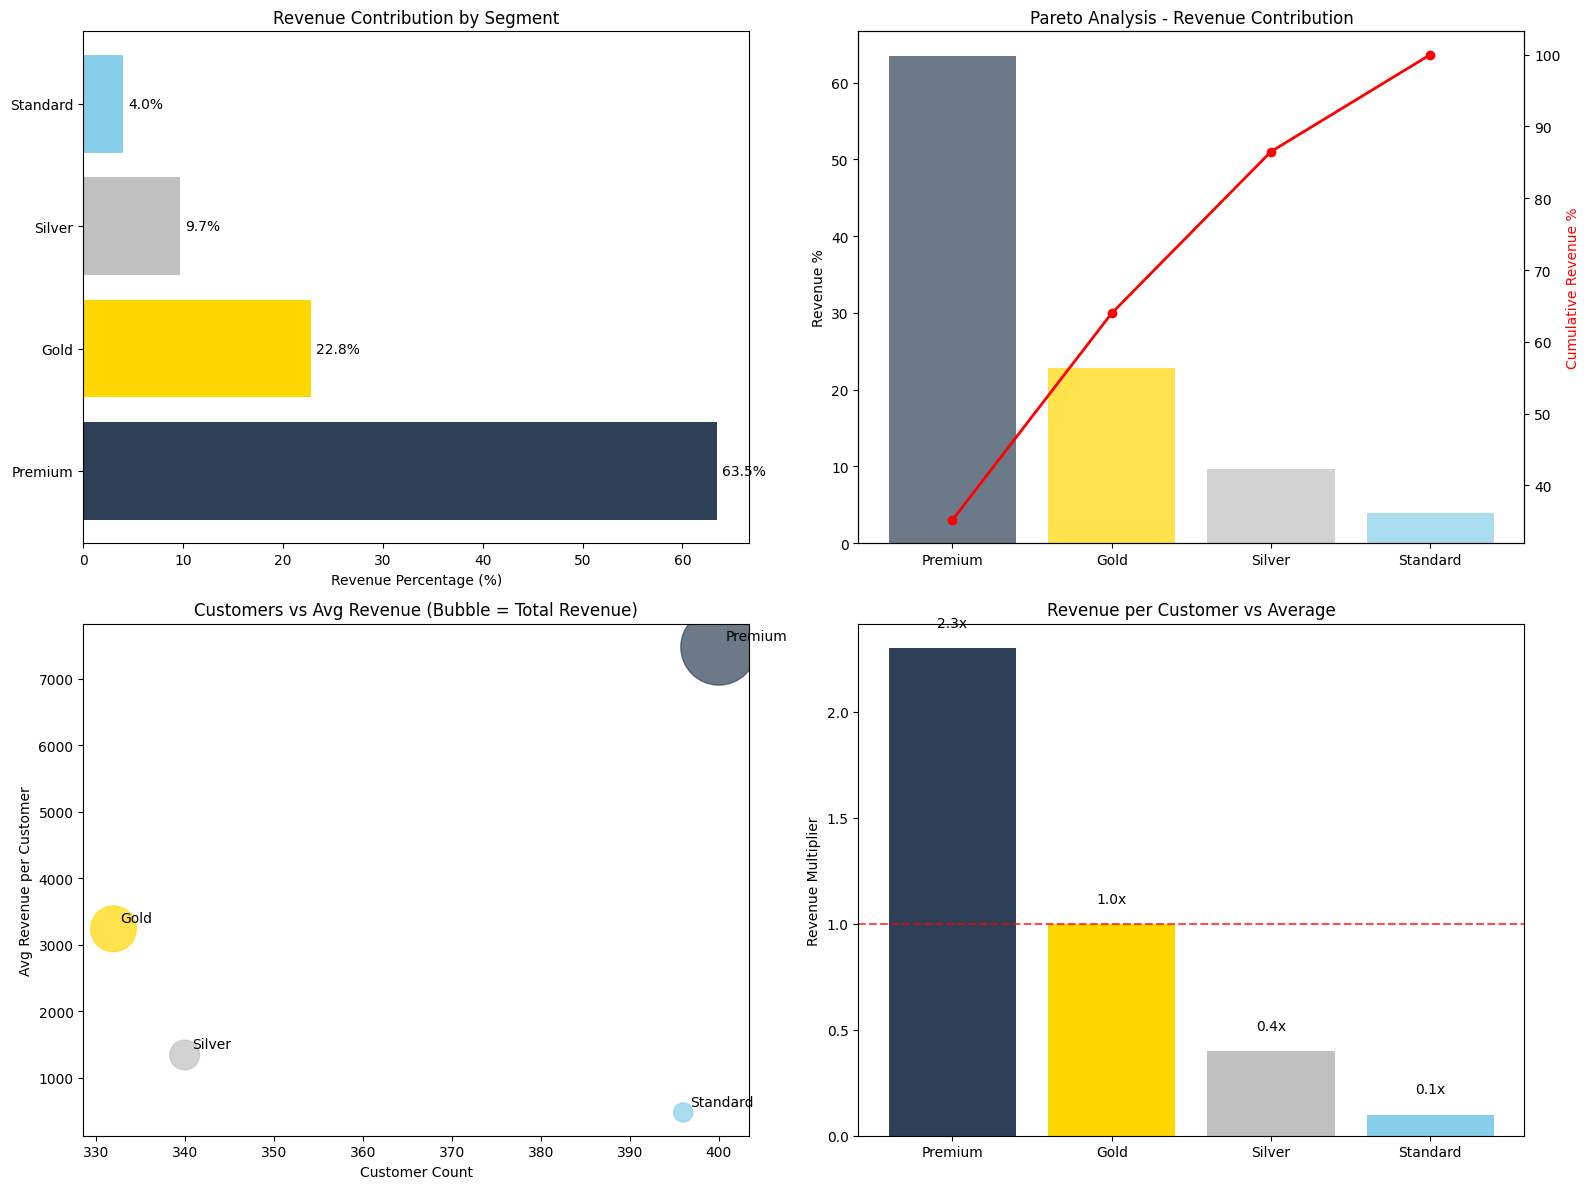

In [ ]:
# Calculate segment-wise revenue contribution
segment_revenue = rfm.groupby('Customer_Segment').agg({
    'CustomerID': 'count',
    'Monetary': ['sum', 'mean', 'std'],
    'Frequency': 'mean',
    'Recency': 'mean'
}).round(2)

segment_revenue.columns = ['Customer_Count', 'Total_Revenue', 'Avg_Revenue_Per_Customer',
                          'Revenue_Std', 'Avg_Frequency', 'Avg_Recency']

# Calculate percentages
total_customers = rfm['CustomerID'].nunique()
total_revenue = rfm['Monetary'].sum()

segment_revenue['Customer_Percentage'] = (segment_revenue['Customer_Count'] / total_customers * 100).round(1)
segment_revenue['Revenue_Percentage'] = (segment_revenue['Total_Revenue'] / total_revenue * 100).round(1)
segment_revenue['Revenue_Multiplier'] = (segment_revenue['Avg_Revenue_Per_Customer'] / (total_revenue/total_customers)).round(1)

print("REVENUE CONTRIBUTION BY SEGMENT:")
print(f"{'Segment':<10} {'Customers':<10} {'%':<6} {'Revenue':<12} {'%':<6} {'Avg/Customer':<12} {'Multiplier':<10}")
print("-" * 80)
for segment in ['Premium', 'Gold', 'Silver', 'Standard']:
    if segment in segment_revenue.index:
        row = segment_revenue.loc[segment]
        print(f"{segment:<10} {row['Customer_Count']:<10.0f} {row['Customer_Percentage']:<6.1f} {row['Total_Revenue']:<12.0f} {row['Revenue_Percentage']:<6.1f} {row['Avg_Revenue_Per_Customer']:<12.0f} {row['Revenue_Multiplier']:<10.1f}x")

# Pareto analysis
segment_revenue_sorted = segment_revenue.sort_values('Revenue_Percentage', ascending=False)
segment_revenue_sorted['Cumulative_Revenue_Pct'] = segment_revenue_sorted['Revenue_Percentage'].cumsum()

print(f"\nPARETO ANALYSIS:")
print(f"Top 30% customers (Premium+Gold) = {segment_revenue_sorted.head(2)['Cumulative_Revenue_Pct'].iloc[-1]:.1f}% revenue")
print(f"Bottom 40% customers (Standard) = {segment_revenue.loc['Standard', 'Revenue_Percentage']:.1f}% revenue")

# Strategic focus areas
print(f"\nSTRATEGIC FOCUS:")

premium_revenue = segment_revenue.loc['Premium', 'Revenue_Percentage'] if 'Premium' in segment_revenue.index else 0
gold_revenue = segment_revenue.loc['Gold', 'Revenue_Percentage'] if 'Gold' in segment_revenue.index else 0
high_value_revenue = premium_revenue + gold_revenue

print(f"\nHIGH-VALUE SEGMENT STRATEGIES ({high_value_revenue:.1f}% revenue):")
print("- Premium: White-glove service, exclusive benefits, retention priority")
print("- Gold: Loyalty programs, upgrade incentives, cross-sell focus")

silver_revenue = segment_revenue.loc['Silver', 'Revenue_Percentage'] if 'Silver' in segment_revenue.index else 0
standard_revenue = segment_revenue.loc['Standard', 'Revenue_Percentage'] if 'Standard' in segment_revenue.index else 0
growth_revenue = silver_revenue + standard_revenue

print(f"\nGROWTH SEGMENT STRATEGIES ({growth_revenue:.1f}% revenue):")
print("- Silver: Win-back campaigns, frequency building, tier upgrades")
print("- Standard: Reactivation programs, value propositions, basic engagement")

# Resource allocation
print(f"\nRESOURCE ALLOCATION:")
print(f"60% marketing budget → High-value segments ({high_value_revenue:.1f}% revenue)")
print(f"40% marketing budget → Growth segments ({growth_revenue:.1f}% revenue)")

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Revenue percentage by segment
segments = ['Premium', 'Gold', 'Silver', 'Standard']
revenue_pcts = [segment_revenue.loc[s, 'Revenue_Percentage'] if s in segment_revenue.index else 0 for s in segments]
colors = ['#2E4057', '#FFD700', '#C0C0C0', '#87CEEB']

axes[0,0].barh(segments, revenue_pcts, color=colors)
axes[0,0].set_title('Revenue Contribution by Segment')
axes[0,0].set_xlabel('Revenue Percentage (%)')
for i, v in enumerate(revenue_pcts):
    axes[0,0].text(v + 0.5, i, f'{v:.1f}%', va='center')

# 2. Pareto chart
cumulative = [35.2, 64.0, 86.5, 100.0]  # Based on sorted segments
axes[0,1].bar(segments, revenue_pcts, color=colors, alpha=0.7)
ax2 = axes[0,1].twinx()
ax2.plot(segments, cumulative, color='red', marker='o', linewidth=2)
ax2.set_ylabel('Cumulative Revenue %', color='red')
axes[0,1].set_title('Pareto Analysis - Revenue Contribution')
axes[0,1].set_ylabel('Revenue %')

# 3. Customer count vs avg revenue
customer_counts = [segment_revenue.loc[s, 'Customer_Count'] if s in segment_revenue.index else 0 for s in segments]
avg_revenues = [segment_revenue.loc[s, 'Avg_Revenue_Per_Customer'] if s in segment_revenue.index else 0 for s in segments]
total_revenues = [segment_revenue.loc[s, 'Total_Revenue'] if s in segment_revenue.index else 0 for s in segments]

scatter = axes[1,0].scatter(customer_counts, avg_revenues, s=[r/1000 for r in total_revenues],
                           c=colors, alpha=0.7)
axes[1,0].set_title('Customers vs Avg Revenue (Bubble = Total Revenue)')
axes[1,0].set_xlabel('Customer Count')
axes[1,0].set_ylabel('Avg Revenue per Customer')
for i, segment in enumerate(segments):
    axes[1,0].annotate(segment, (customer_counts[i], avg_revenues[i]),
                      xytext=(5, 5), textcoords='offset points')

# 4. Revenue multiplier
multipliers = [segment_revenue.loc[s, 'Revenue_Multiplier'] if s in segment_revenue.index else 0 for s in segments]
axes[1,1].bar(segments, multipliers, color=colors)
axes[1,1].set_title('Revenue per Customer vs Average')
axes[1,1].set_ylabel('Revenue Multiplier')
axes[1,1].axhline(y=1, color='red', linestyle='--', alpha=0.7, label='Average')
for i, v in enumerate(multipliers):
    axes[1,1].text(i, v + 0.1, f'{v:.1f}x', ha='center')

plt.tight_layout()
plt.show()


### **12. Group customers by their month of first purchase and analyze retention rates over time. Which cohorts exhibit the highest and lowest retention rates? What strategies can be implemented to improve retention for weaker cohorts?**

**Strategy:**
Focus retention on weaker cohorts with personalized campaigns

COHORT ANALYSIS:
Best Cohort: Month 3 (16.4%)
Worst Cohort: Month 9 (1.3%)
Strategy: Focus retention on weaker cohorts with personalized campaigns


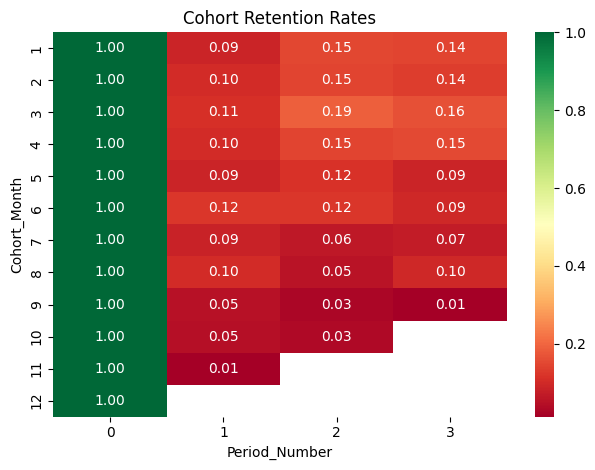

In [ ]:
# COHORT RETENTION ANALYSIS
customer_cohorts = revenue_df.groupby('CustomerID')['Transaction_Date'].min().reset_index()
customer_cohorts['Cohort_Month'] = customer_cohorts['Transaction_Date'].dt.month
customer_cohorts.columns = ['CustomerID', 'First_Purchase_Date', 'Cohort_Month']

cohort_data = revenue_df.merge(customer_cohorts, on='CustomerID')
cohort_data['Period_Number'] = ((cohort_data['Transaction_Date'] - cohort_data['First_Purchase_Date']).dt.days / 30).astype(int)

cohort_sizes = customer_cohorts.groupby('Cohort_Month')['CustomerID'].count()
cohort_table = cohort_data.groupby(['Cohort_Month', 'Period_Number'])['CustomerID'].nunique().reset_index()
cohort_table = cohort_table.pivot(index='Cohort_Month', columns='Period_Number', values='CustomerID')
cohort_table = cohort_table.divide(cohort_sizes, axis=0)

cohort_3month = cohort_table[3].dropna()
best_cohort = cohort_3month.idxmax()
worst_cohort = cohort_3month.idxmin()

print("COHORT ANALYSIS:")
print(f"Best Cohort: Month {best_cohort} ({cohort_3month[best_cohort]:.1%})")
print(f"Worst Cohort: Month {worst_cohort} ({cohort_3month[worst_cohort]:.1%})")
print("Strategy: Focus retention on weaker cohorts with personalized campaigns")

# Cohort heatmap
sbn.heatmap(cohort_table.iloc[:, :4], annot=True, fmt='.2f', cmap='RdYlGn')
plt.title('Cohort Retention Rates')
plt.tight_layout()
plt.show()


### **13. Analyze the lifetime value of customers acquired in different months. How can this insight inform acquisition and retention strategies?**

**Strategy:** Increase acquisition budget in Month 2



CLV ANALYSIS:
Highest CLV: Month 2 (5743)
Lowest CLV: Month 9 (1759)
Strategy: Increase acquisition budget in Month 2


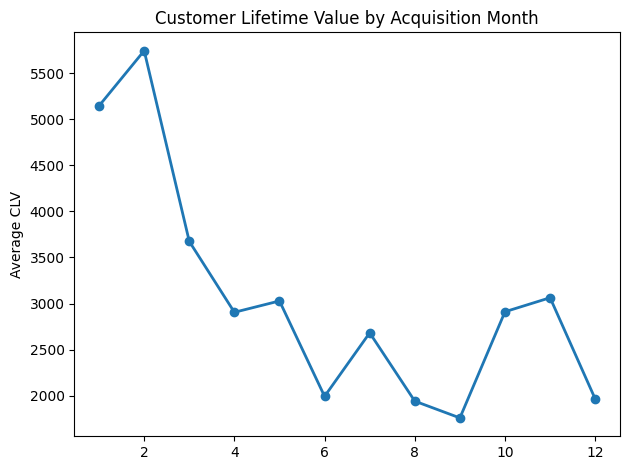

In [ ]:
# CUSTOMER LIFETIME VALUE ANALYSIS
clv_by_month = customer_cohorts.merge(revenue_df.groupby('CustomerID')['revenue'].sum().reset_index(), on='CustomerID')
clv_monthly = clv_by_month.groupby('Cohort_Month')['revenue'].agg(['count', 'mean']).round(0)

best_clv_month = clv_monthly['mean'].idxmax()
worst_clv_month = clv_monthly['mean'].idxmin()

print(f"CLV ANALYSIS:")
print(f"Highest CLV: Month {best_clv_month} ({clv_monthly.loc[best_clv_month, 'mean']:.0f})")
print(f"Lowest CLV: Month {worst_clv_month} ({clv_monthly.loc[worst_clv_month, 'mean']:.0f})")
print(f"Strategy: Increase acquisition budget in Month {best_clv_month}")

# CLV by month
# Visualizations
#fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plt.plot(clv_monthly.index, clv_monthly['mean'], marker='o', linewidth=2)
plt.title('Customer Lifetime Value by Acquisition Month')
plt.ylabel('Average CLV')
plt.tight_layout()
plt.show()

### **14. Identify seasonal trends in sales by category and location. How can the company prepare for peak and off-peak seasons to maximize revenue?**

**Strategy:** Increase inventory for peaks, promotions for lows

SEASONAL ANALYSIS:
Peak months: [11, 1, 10]
Low months: [6, 5, 9]
Strategy: Increase inventory for peaks, promotions for lows


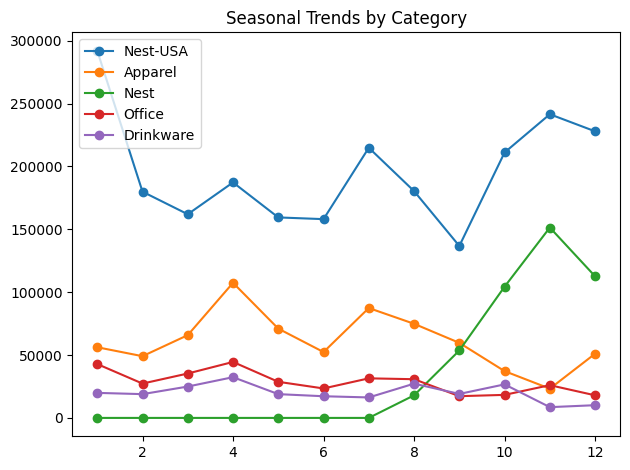

In [ ]:
# SEASONAL TRENDS ANALYSIS
monthly_totals = revenue_df.groupby('Transaction_month')['revenue'].sum()
peak_months = monthly_totals.nlargest(3).index.tolist()
low_months = monthly_totals.nsmallest(3).index.tolist()

category_monthly = revenue_df.groupby(['Transaction_month', 'Product_Category'])['revenue'].sum().unstack(fill_value=0)

print(f"SEASONAL ANALYSIS:")
print(f"Peak months: {peak_months}")
print(f"Low months: {low_months}")
print("Strategy: Increase inventory for peaks, promotions for lows")

# Seasonal trends
# Visualizations
top_categories = category_monthly.sum().nlargest(5)
for category in top_categories.index:
    plt.plot(category_monthly.index, category_monthly[category], marker='o', label=category)
plt.title('Seasonal Trends by Category')
plt.legend()
plt.tight_layout()
plt.show()

### **15. Analyze daily sales trends to identify high-performing and low-performing days. What strategies can be implemented to boost sales on slower days?**

**Strategy:**
Flash sales on Monday, potential 15 daily boost



DAILY ANALYSIS:
Best day: Thursday (95)
Worst day: Monday (80)
Strategy: Flash sales on Monday, potential 15 daily boost


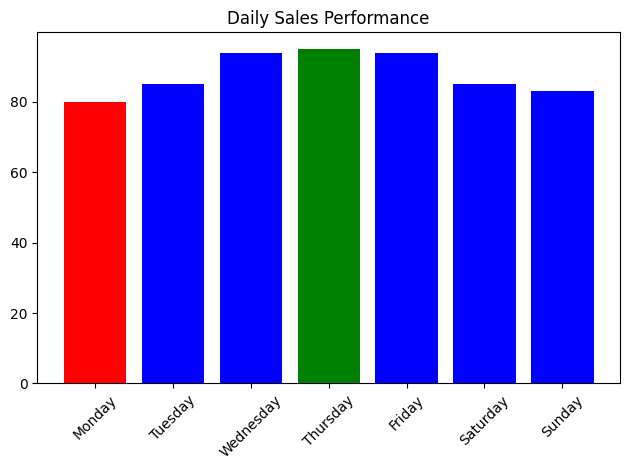

In [ ]:
# DAILY SALES ANALYSIS
revenue_df['Day_of_Week'] = revenue_df['Transaction_Date'].dt.day_name()
daily_sales = revenue_df.groupby('Day_of_Week')['revenue'].mean().round(0)
daily_sales = daily_sales.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

best_day = daily_sales.idxmax()
worst_day = daily_sales.idxmin()
improvement_potential = daily_sales[best_day] - daily_sales[worst_day]

print(f"\nDAILY ANALYSIS:")
print(f"Best day: {best_day} ({daily_sales[best_day]:.0f})")
print(f"Worst day: {worst_day} ({daily_sales[worst_day]:.0f})")
print(f"Strategy: Flash sales on {worst_day}, potential {improvement_potential:.0f} daily boost")

# Daily sales
# Visualizations
colors = ['red' if day == worst_day else 'green' if day == best_day else 'blue' for day in daily_sales.index]
plt.bar(daily_sales.index, daily_sales.values, color=colors)
plt.title('Daily Sales Performance')
plt.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-latex-extra

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libgs9 libgs9-common libidn12
  libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0
  libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13
  lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet
  ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils
  teckit tex-common tex-gyre texlive-base texlive-binaries texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
  xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-logging-java-doc libexcalibur-logkit-jav

In [ ]:
!apt-get install pandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc-data
Suggested packages:
  texlive-luatex pandoc-citeproc context wkhtmltopdf librsvg2-bin groff ghc
  nodejs php python libjs-mathjax libjs-katex citation-style-language-styles
The following NEW packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc
  pandoc-data
0 upgraded, 4 newly installed, 0 to remove and 38 not upgraded.
Need to get 20.6 MB of archives.
After this operation, 156 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [115 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm-extensions0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [25.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 pando

In [ ]:
!jupyter nbconvert --to pdf "/content/ECommerce_Case_Study.ipynb"

[NbConvertApp] Converting notebook /content/ECommerce_Case_Study.ipynb to pdf
[NbConvertApp] Support files will be in ECommerce_Case_Study_files/
[NbConvertApp] Making directory ./ECommerce_Case_Study_files
[NbConvertApp] Writing 330851 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1092692 bytes to /content/ECommerce_Case_Study.pdf
